# **Time Series Forecasting Project**



## **Problem Statement-** 
The data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, we are tasked to analyse and forecast Wine Sales in the 20th century.

### **Rose Wine Sales**

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
rose = pd.read_csv('Rose.csv',parse_dates=['YearMonth'])#Loading the Dataset

In [3]:
rose.set_index(['YearMonth'],inplace=True)

### Info about Data

In [4]:
rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [5]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [6]:
rose.isnull().sum()

Rose    2
dtype: int64

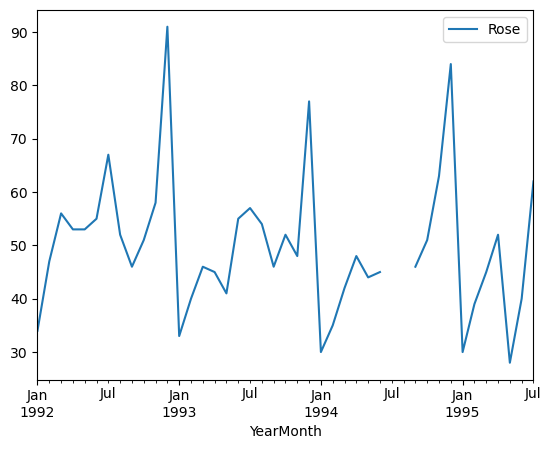

In [7]:
rose[rose.index.year>1991].plot();

In [8]:
rose[rose['Rose'].isna()]

Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN

In [9]:
rose_copy = rose.copy(deep=True)

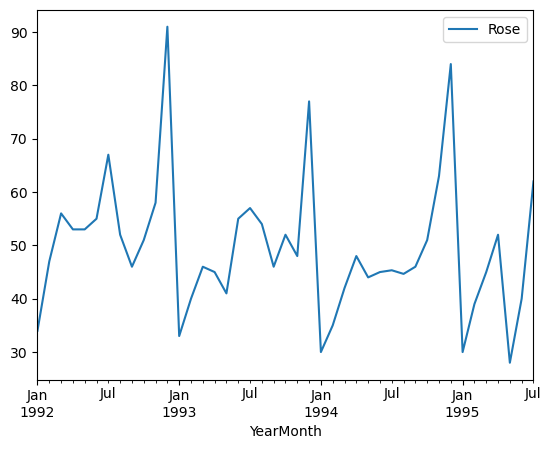

In [10]:
rose_copy[rose_copy.index.year>=1992].interpolate(method='spline',order=2).plot();

Using spline method to imnpute the missing values

In [11]:
rose = rose_copy.interpolate(method='spline',order=2)

## EDA

In [12]:
rose.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  187.0  89.908354  39.245313  28.0  62.5  85.0  111.0  267.0

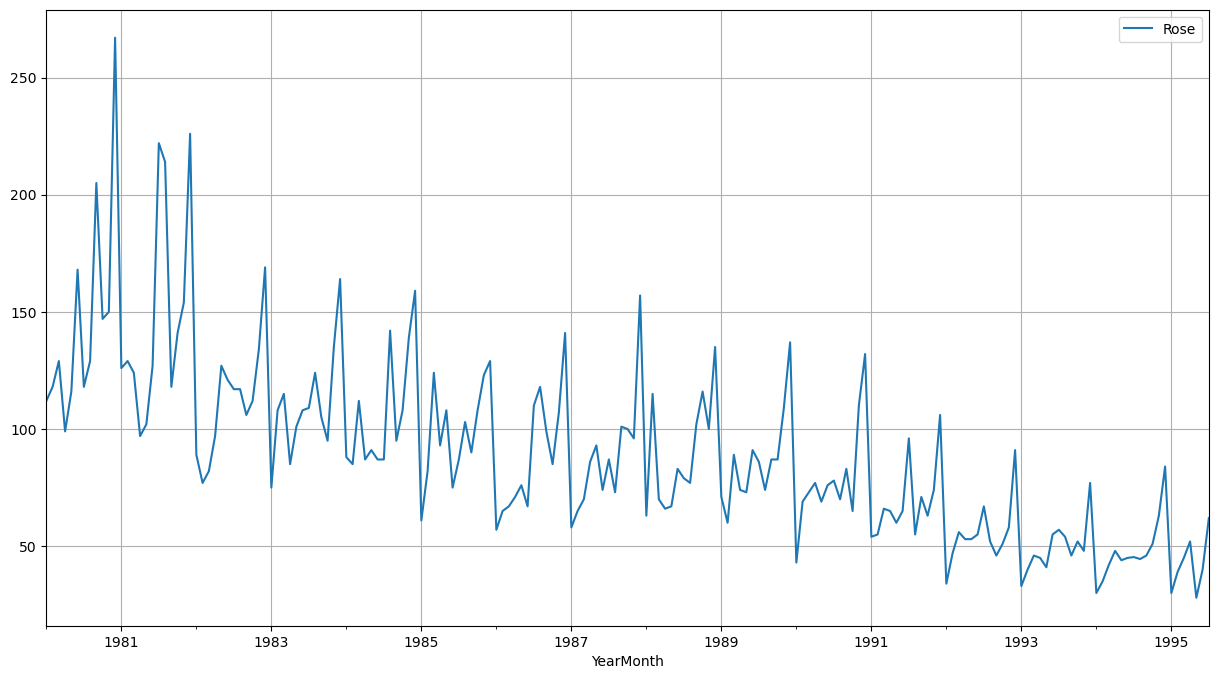

In [13]:
fig,ax = plt.subplots(figsize = (15,8))
rose.plot(ax= ax)
plt.grid()

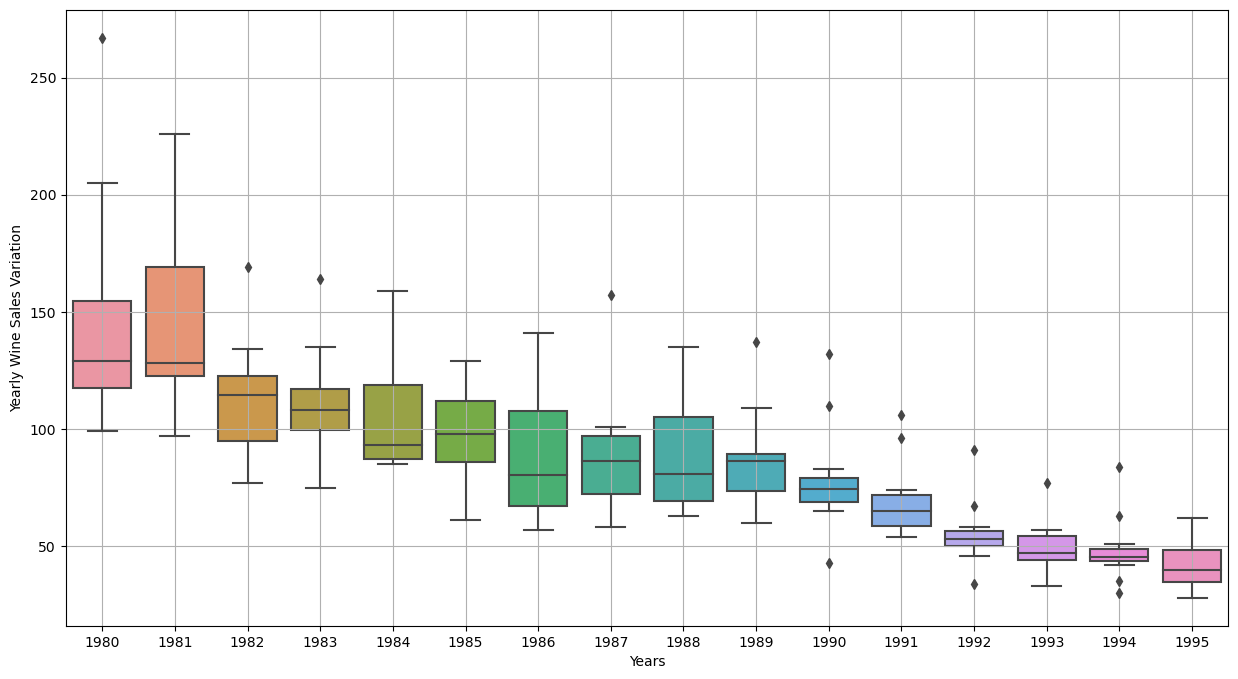

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=rose.index.year,y=rose['Rose'], ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales Variation');

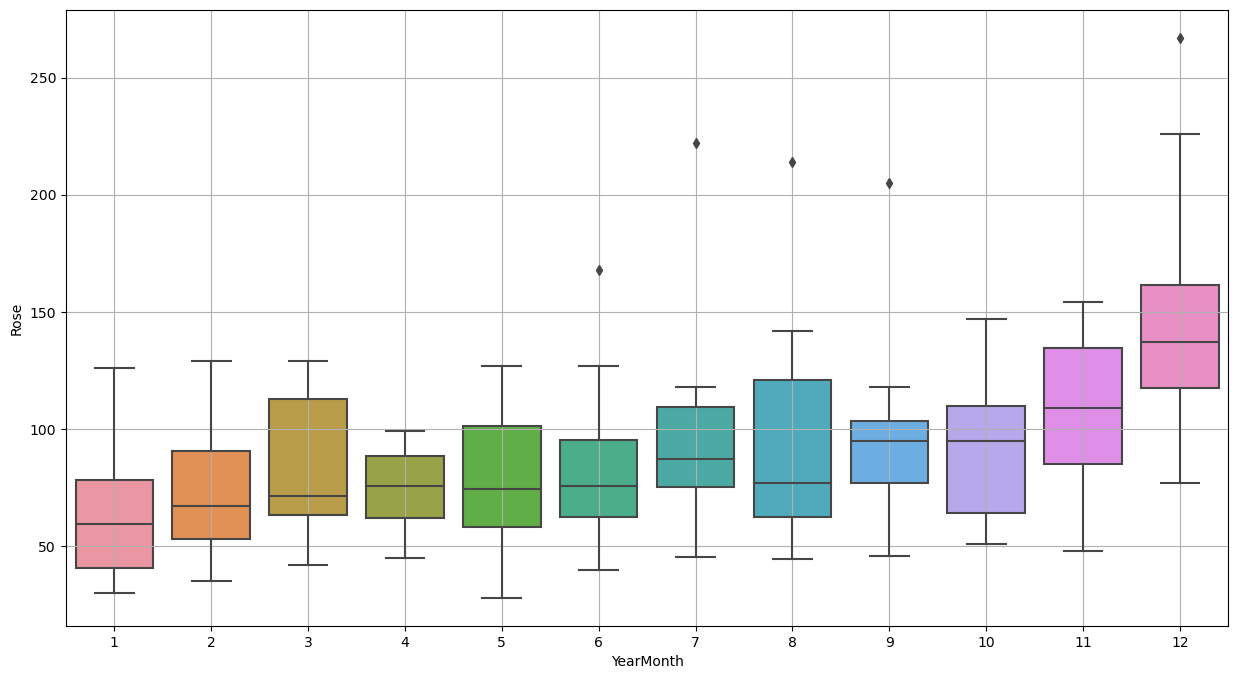

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(rose.index.month,rose['Rose'], ax=ax,whis=1.5)
plt.grid();

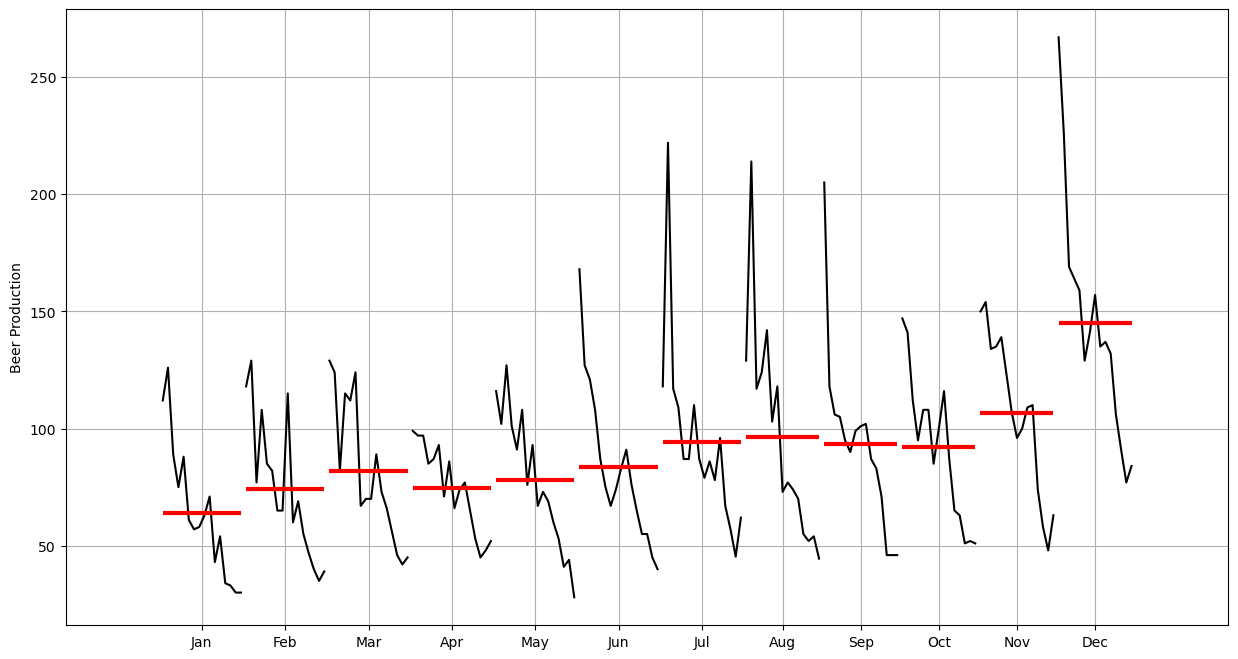

In [16]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(15,8))

month_plot(rose['Rose'],ylabel='Beer Production',ax=ax)
plt.grid();

In [17]:
yearly_sales_x_month=pd.pivot_table(rose,values=['Rose'],index=rose.index.year,columns=rose.index.month)

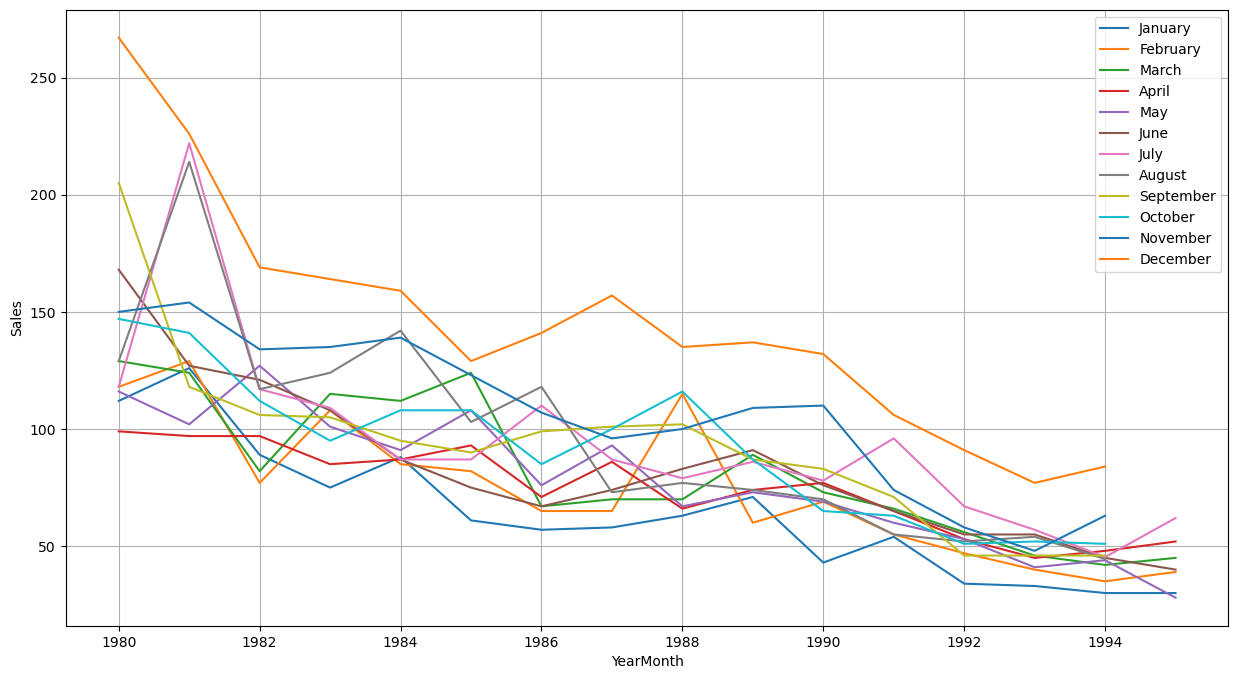

In [18]:
fig, ax = plt.subplots(figsize=(15,8))

yearly_sales_x_month.plot(ax =ax);
labels = rose.index.month_name()
plt.ylabel('Sales')
plt.grid();
plt.legend(labels)

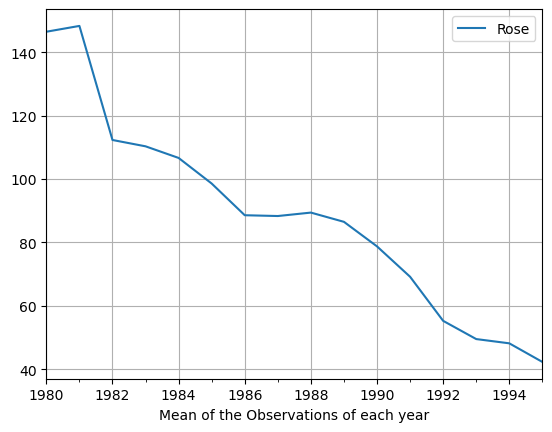

In [19]:
rose_yearly_sum = rose.resample('A').mean()
rose_yearly_sum.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

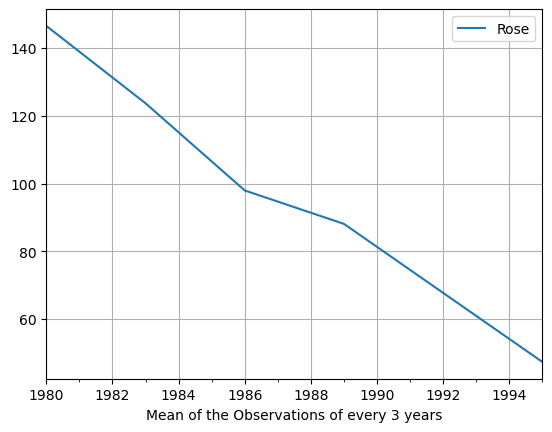

In [20]:
rose_3_years = rose.resample('3Y').mean()
rose_3_years.plot()
plt.grid()
plt.xlabel('Mean of the Observations of every 3 years');

In [21]:
rose[rose.index.year>=1995]

Rose
YearMonth       
1995-01-01  30.0
1995-02-01  39.0
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

### Decomposition of Time Series

In [22]:
from pylab import rcParams 
rcParams['figure.figsize'] = 15,8

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
decompose = seasonal_decompose(rose['Rose'],model='additive')

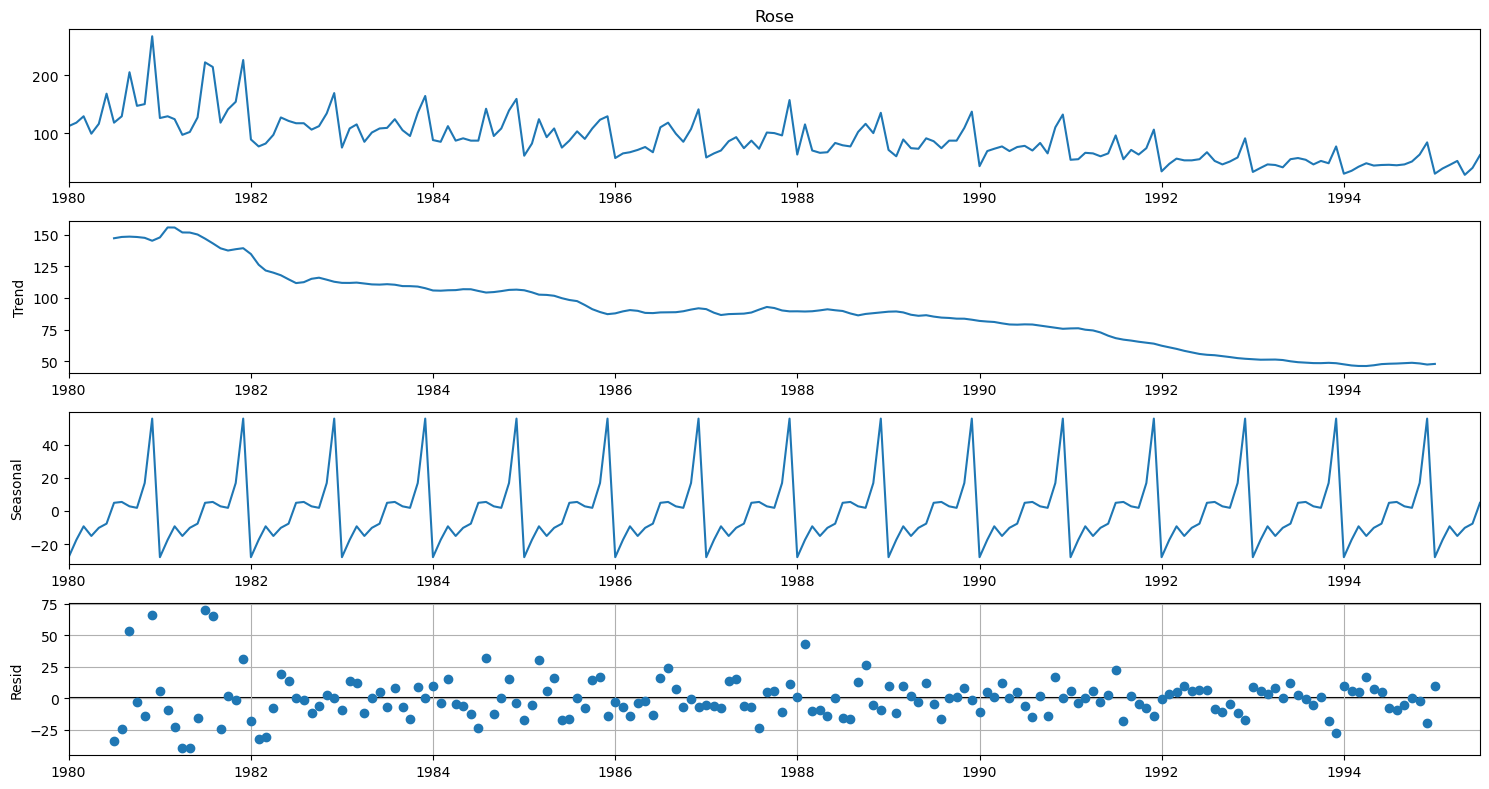

In [25]:
decompose.plot()
plt.grid();

In [26]:
decompose = seasonal_decompose(rose['Rose'],model='mutiplicative')

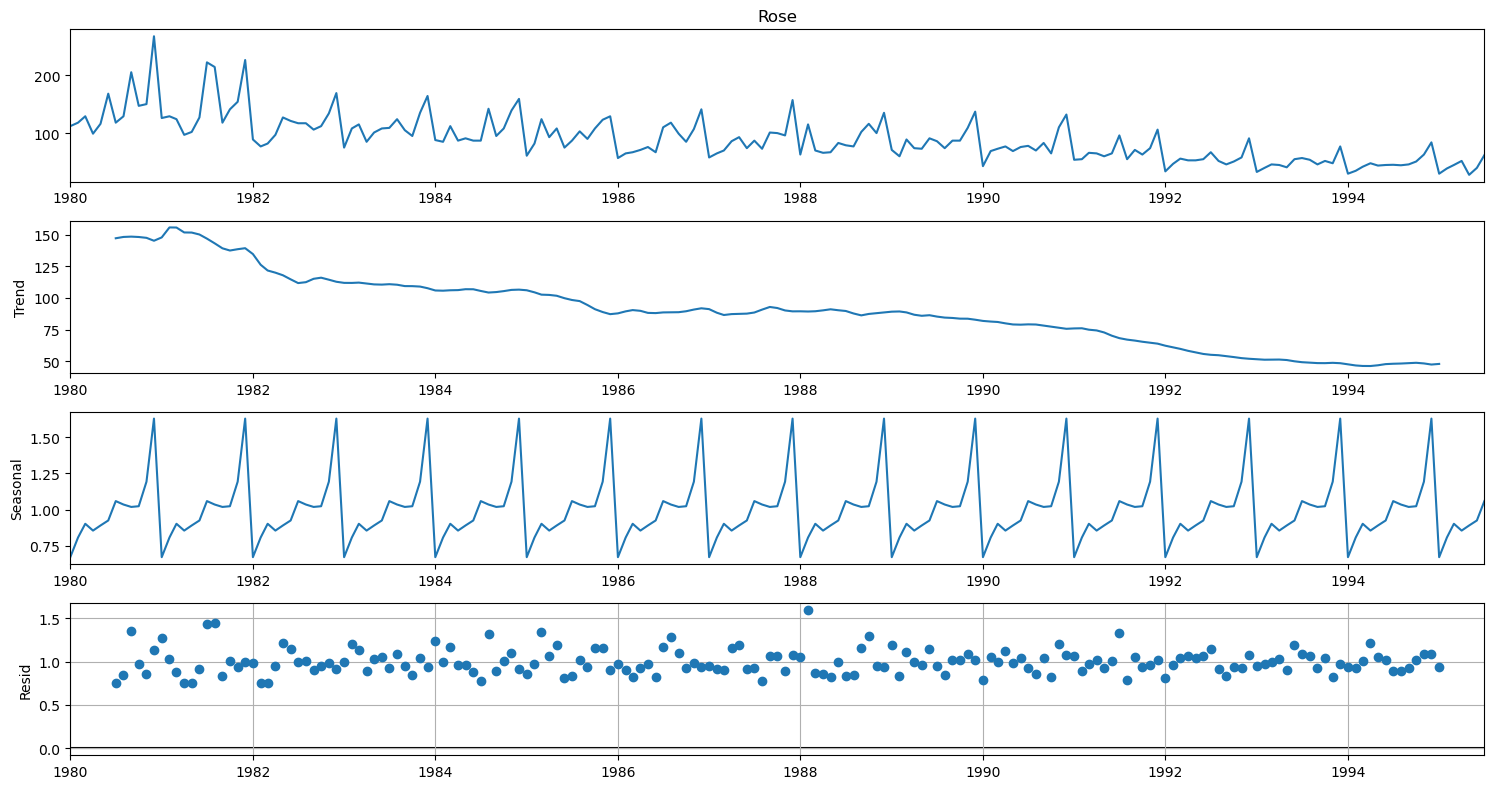

In [27]:
decompose.plot()
plt.grid();

In [28]:
trend = decompose.trend
seasonality = decompose.seasonal
residual = decompose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670192
1980-02-01    0.806215
1980-03-01    0.901294
1980-04-01    0.854174
1980-05-01    0.889548
1980-06-01    0.924116
1980-07-01    1.058182
1980-08-01    1.034409
1980-09-01    1.017769
1980-10-01    1.022706
1980-11-01    1.192516
1980-12-01    1.628878
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758155
1980-08-01    0.841916
1980-09-01    1.357513
1980-10-01    0.970645
1980-11-01    0.853258
1980-12-01    1.129485
Name: resid, dtype: fl

### Splitting the Data in Train and Test set

In [29]:
train = rose[rose.index<'1991']
test = rose[rose.index>='1991']

In [30]:
print('First five rows of train data\n'+'-'*50+'\n',train.head(),'\n')
print('Last five rows of train data\n'+'-'*50+'\n',train.head(),'\n')
print('First five rows of test data\n'+'-'*50+'\n',test.head(),'\n')
print('Last five rows of test data\n'+'-'*50+'\n',test.head())
# just to verify if the splitting is done correctly

First five rows of train data
--------------------------------------------------
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last five rows of train data
--------------------------------------------------
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

First five rows of test data
--------------------------------------------------
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last five rows of test data
--------------------------------------------------
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0


In [31]:
print('The number of rows in the train set are {}'.format(train.shape[0]))
print('The number of rows in the test set are {}'.format(test.shape[0]))

The number of rows in the train set are 132
The number of rows in the test set are 55


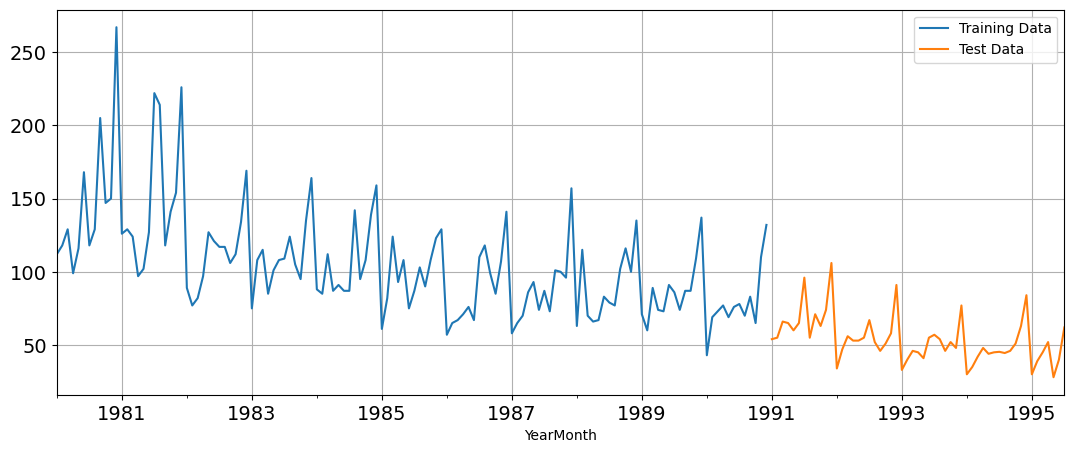

In [32]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Building different models and comparing the metrics

## Model 1: Linear Regression

In [33]:
train_lr = train.copy()
train_lr['LR'] = np.arange(0,len(train['Rose']))

In [34]:
test_lr = test.copy()
test_lr['LR'] = np.arange(0,len(test['Rose']))

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(train_lr[['LR']],train_lr['Rose'].values)

LinearRegression()

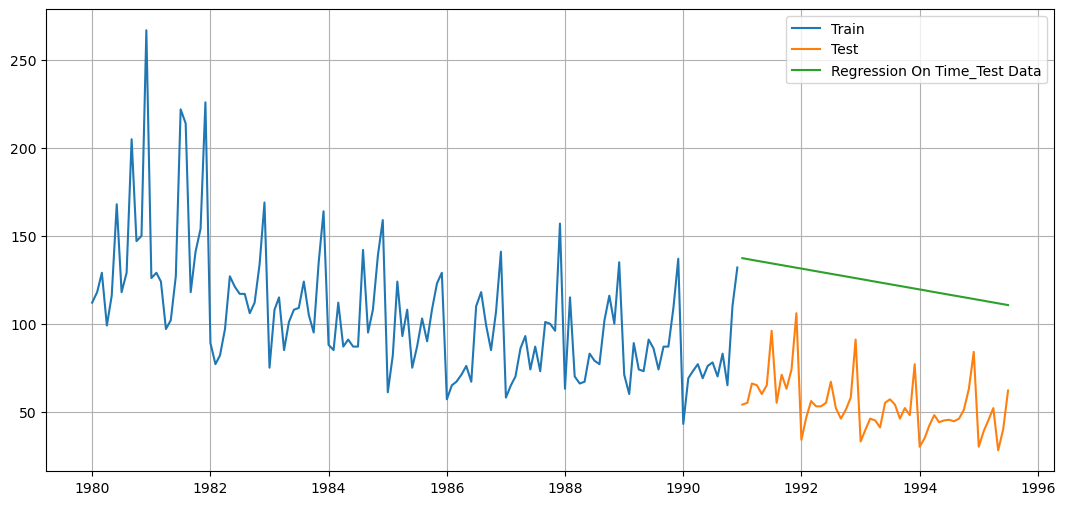

In [38]:
test_pred_LR         = lr.predict(test_lr[['LR']])
test_lr['RegOnTime'] = test_pred_LR

plt.figure(figsize=(13,6))
plt.plot(train_lr['Rose'], label='Train')
plt.plot(test_lr['Rose'], label='Test')
plt.plot(test_lr['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [39]:
from sklearn import metrics

In [40]:
## Test Data - RMSE

rmse_lr_test = metrics.mean_squared_error(test_lr['Rose'],test_pred_LR,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %.3f" %(rmse_lr_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 71.617


In [41]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_lr_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  71.617332

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [42]:
train_naive = train.copy()
test_naive = test.copy()

In [43]:
test_naive['naive'] = train['Rose'][-1]

In [44]:
test_naive.head()

Rose  naive
YearMonth              
1991-01-01  54.0  132.0
1991-02-01  55.0  132.0
1991-03-01  66.0  132.0
1991-04-01  65.0  132.0
1991-05-01  60.0  132.0

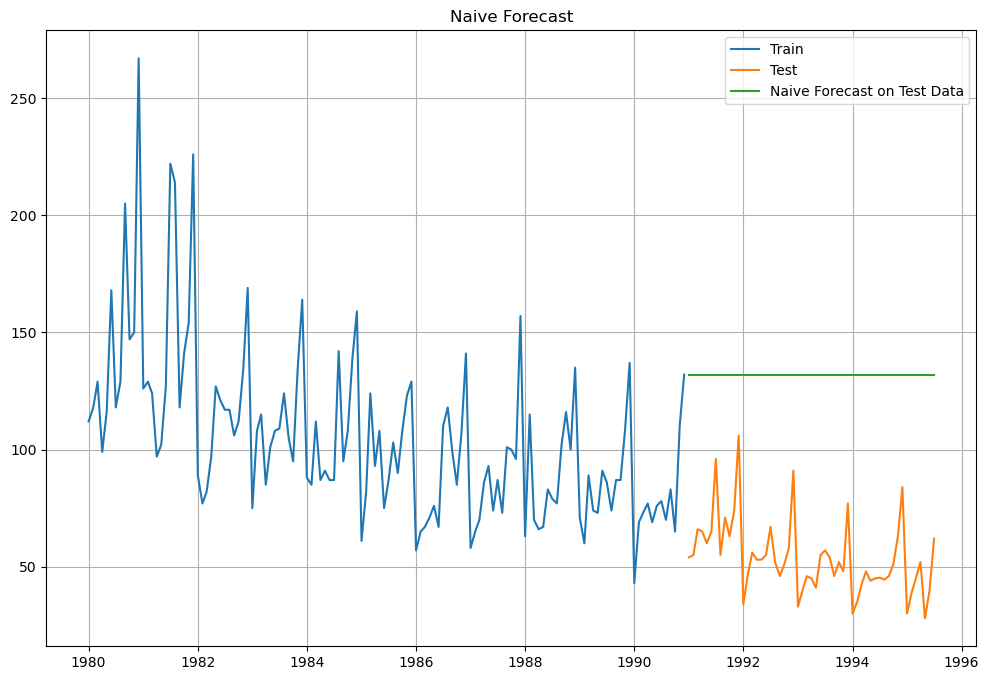

In [45]:
plt.figure(figsize=(12,8))
plt.plot(train_naive['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(test_naive['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [46]:
## Test Data - RMSE

rmse_naive_test = metrics.mean_squared_error(test_naive['Rose'],test_naive['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %.3f" %(rmse_naive_test))

For Naive forecast on the Test Data,  RMSE is 79.741


In [47]:
resultsDf.loc['NaiveModel'] = {'Test RMSE': rmse_naive_test}
resultsDf

Test RMSE
RegressionOnTime  71.617332
NaiveModel        79.741326

## Model 3: Simple Average

In [48]:
train_SA = train.copy()
test_SA = test.copy()

In [49]:
test_SA['mean_forecast'] = train_SA['Rose'].mean()
test_SA.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

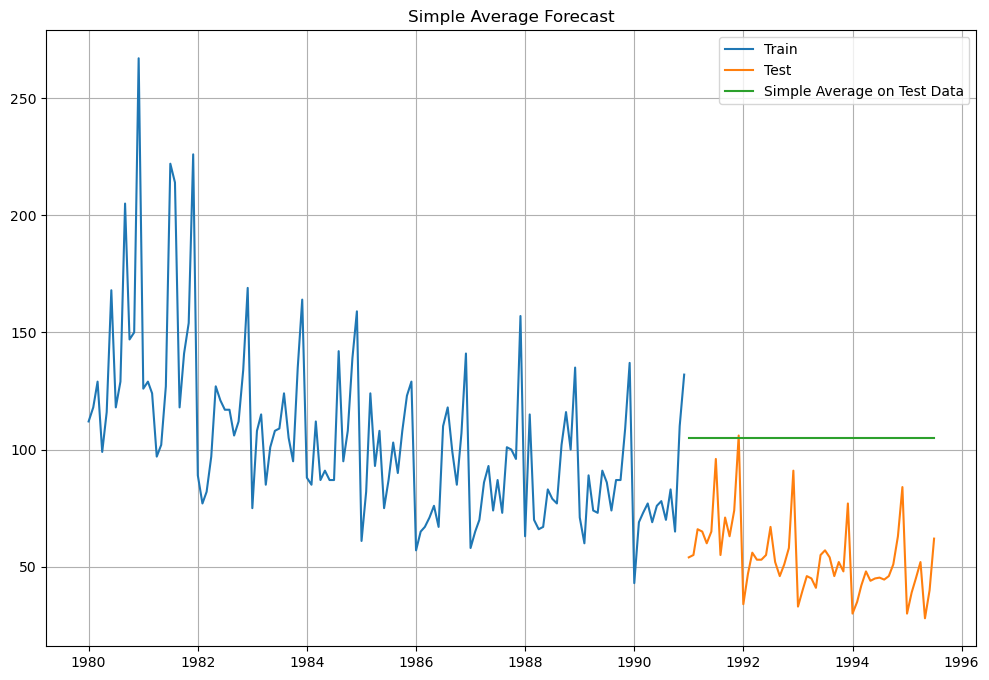

In [50]:
plt.figure(figsize=(12,8))
plt.plot(train_SA['Rose'], label='Train')
plt.plot(test_SA['Rose'], label='Test')
plt.plot(test_SA['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [51]:
## Test Data - RMSE

rmse_SA_test = metrics.mean_squared_error(test_SA['Rose'],test_SA['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %.3f" %(rmse_SA_test))

For Simple Average forecast on the Test Data,  RMSE is 53.484


In [52]:
resultsDf.loc['SimpleAverage'] = {'Test RMSE': rmse_SA_test}
resultsDf

Test RMSE
RegressionOnTime  71.617332
NaiveModel        79.741326
SimpleAverage     53.483727

## Model 4: Moving Average(MA)

In [53]:
MA_model = rose.copy()
MA_model.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [54]:

MA_model['Trailing_2'] = MA_model['Rose'].rolling(2).mean()
MA_model['Trailing_4'] = MA_model['Rose'].rolling(4).mean()
MA_model['Trailing_6'] = MA_model['Rose'].rolling(6).mean()
MA_model['Trailing_9'] = MA_model['Rose'].rolling(9).mean()

MA_model.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

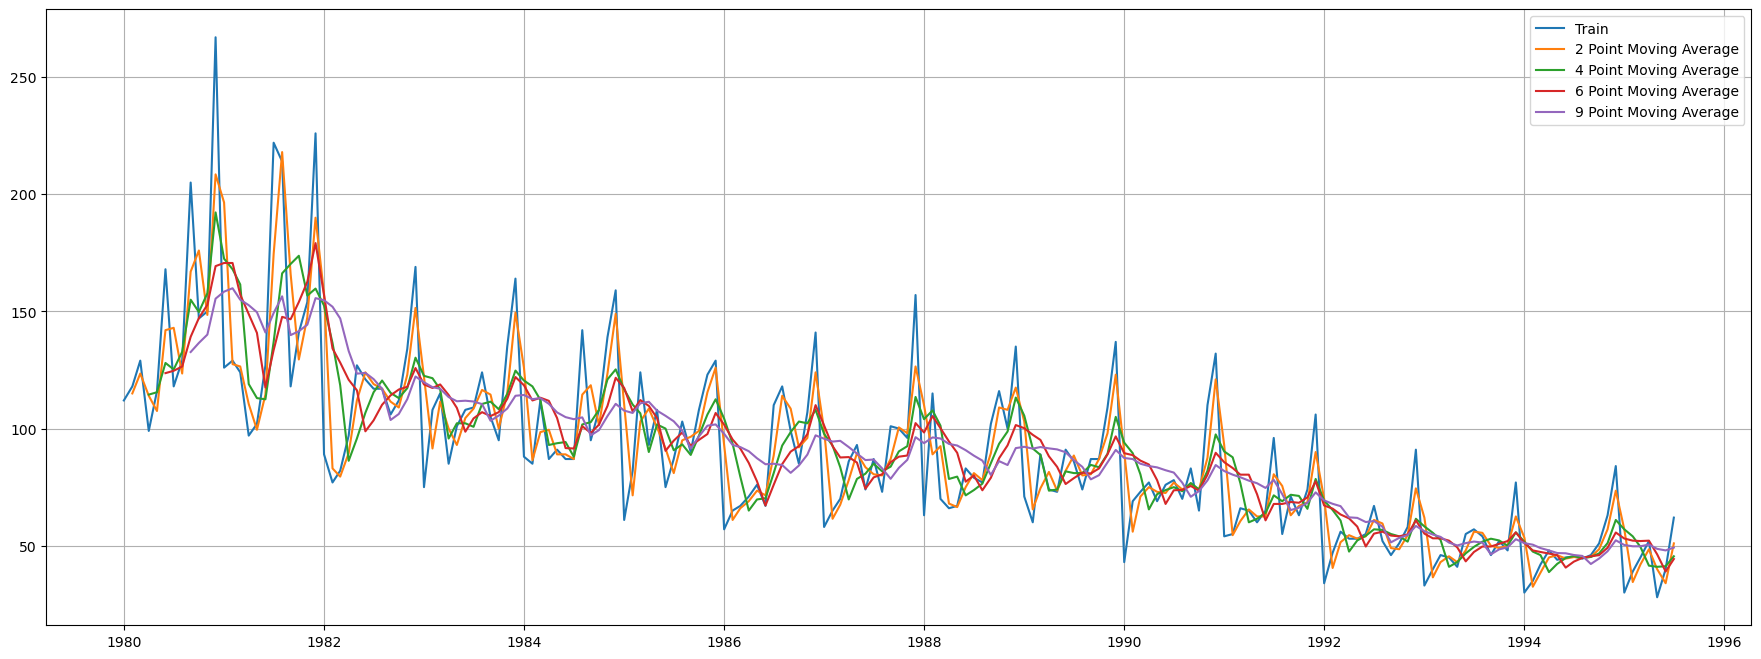

In [55]:
## Plotting on the whole data

plt.figure(figsize=(22,8))
plt.plot(MA_model['Rose'], label='Train')
plt.plot(MA_model['Trailing_2'], label='2 Point Moving Average')
plt.plot(MA_model['Trailing_4'], label='4 Point Moving Average')
plt.plot(MA_model['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MA_model['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [56]:
#Creating train and test set 
trailing_MA_model_train=MA_model[MA_model.index<'1991'] 
trailing_MA_model_test=MA_model[MA_model.index>='1991']

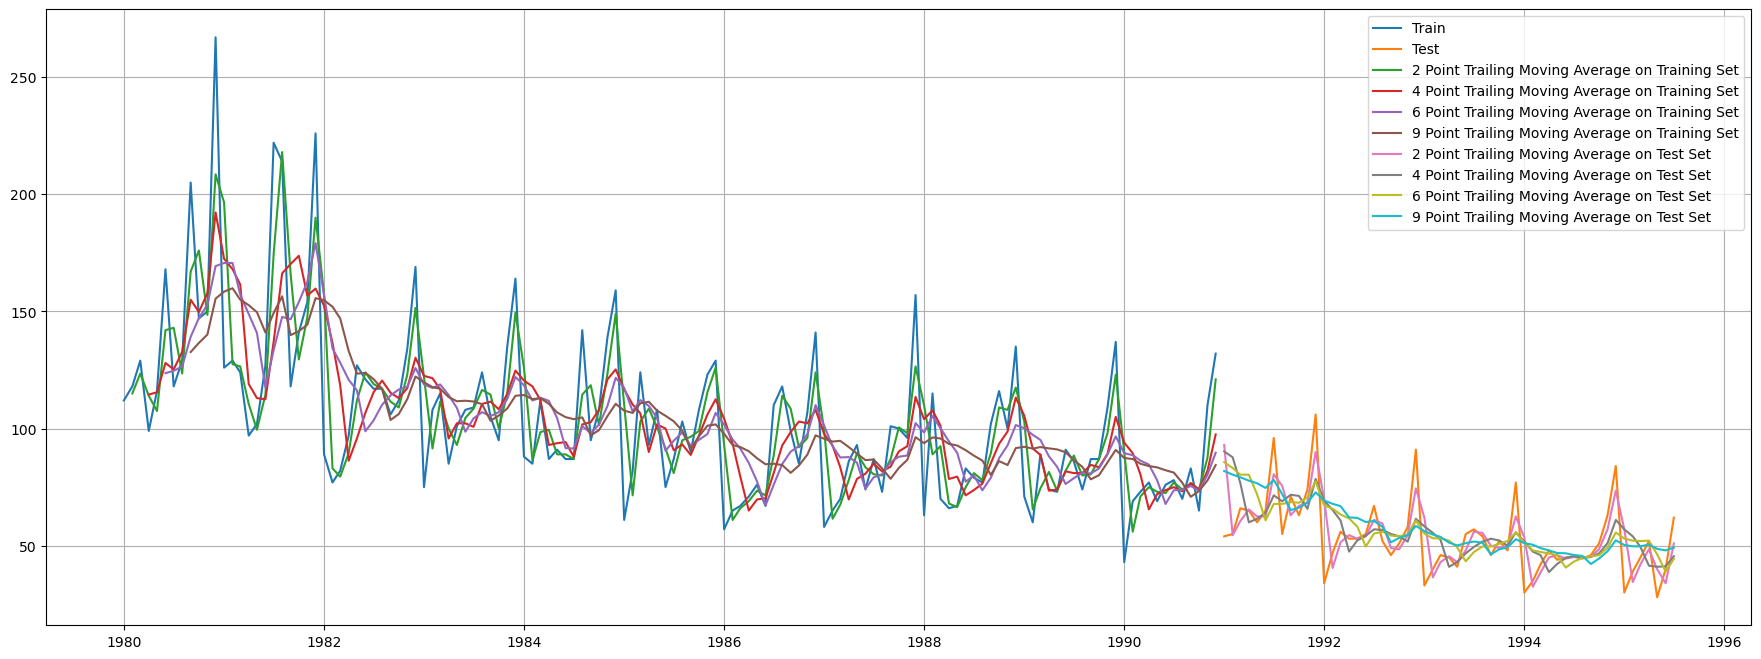

In [57]:
## Plotting on both the Training and Test data

plt.figure(figsize=(22,8))
plt.plot(trailing_MA_model_train['Rose'], label='Train')
plt.plot(trailing_MA_model_test['Rose'], label='Test')

plt.plot(trailing_MA_model_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MA_model_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MA_model_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MA_model_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MA_model_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MA_model_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MA_model_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MA_model_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

In [58]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_MA_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MA_model_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %0.3f" %(rmse_MA_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_MA_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MA_model_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %0.3f" %(rmse_MA_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_MA_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MA_model_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %0.3f" %(rmse_MA_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_MA_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MA_model_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %0.3f " %(rmse_MA_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.457
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.572
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.732 


In [59]:
resultsDf.loc['2pointTrailingMovingAverageBest'] = {'Test RMSE' : rmse_MA_test_2 }
# resultsDf.loc['4pointTrailingMovingAverage'] = {'Test RMSE' : rmse_MA_test_4 }
# resultsDf.loc['6pointTrailingMovingAverage'] = {'Test RMSE' : rmse_MA_test_6 }
# resultsDf.loc['9pointTrailingMovingAverage'] = {'Test RMSE' : rmse_MA_test_9 }

In [60]:
resultsDf

Test RMSE
RegressionOnTime                 71.617332
NaiveModel                       79.741326
SimpleAverage                    53.483727
2pointTrailingMovingAverageBest  11.529811

## Visualization of all the models built till this stage (before moving on Exponential Smoothing Models )

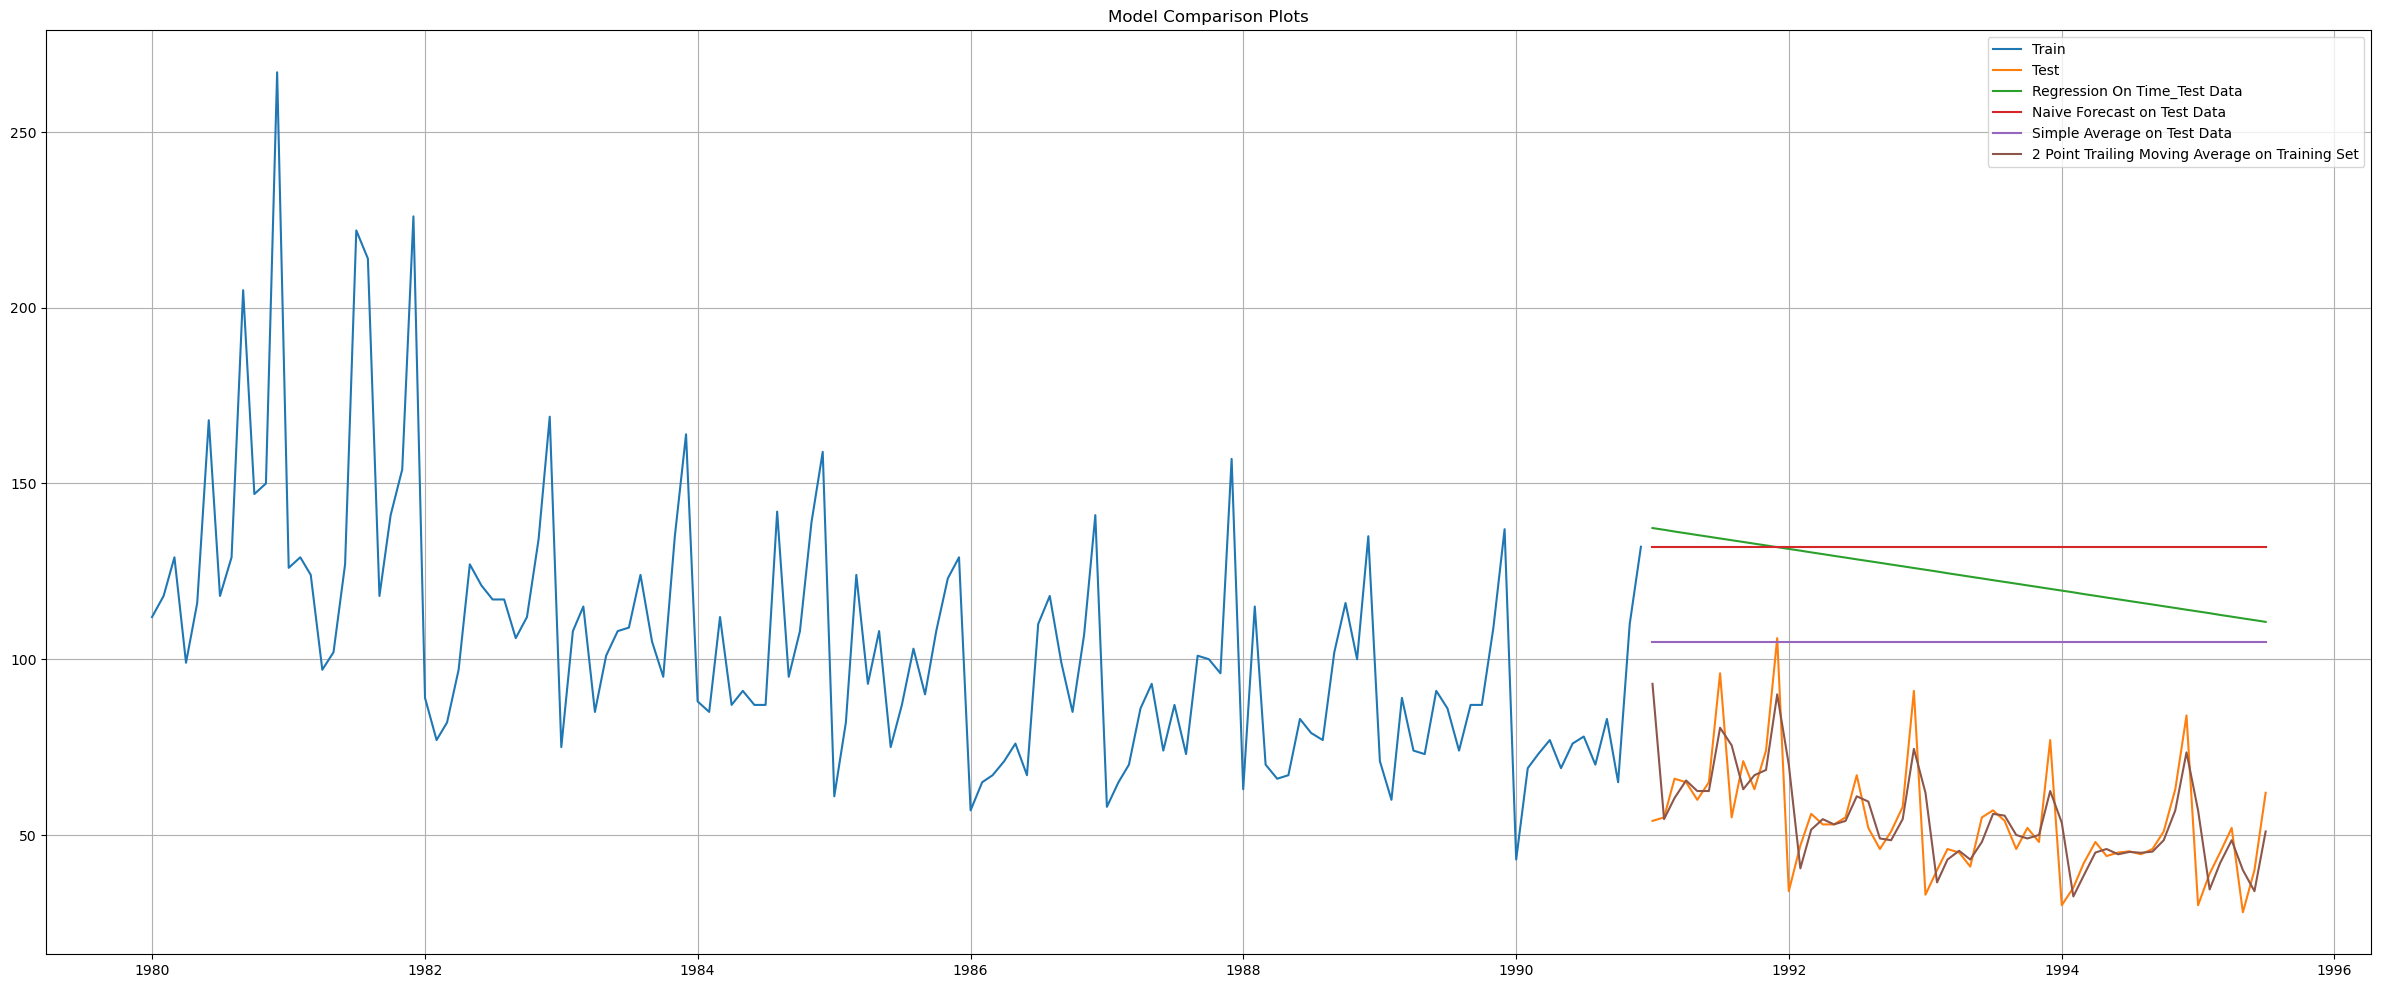

In [61]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(test_lr['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(test_naive['naive'], label='Naive Forecast on Test Data')

plt.plot(test_SA['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MA_model_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Exponential Smoothing Models

In [62]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

### Model 5: Simple Exponential Smoothing Model

In [63]:
SES_train = train.copy()
SES_test = test.copy()

In [64]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [65]:
model_SES_autofit = model_SES.fit(optimized=True)

In [66]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head().round()

Rose  predict
YearMonth                
1991-01-01  54.0     87.0
1991-02-01  55.0     87.0
1991-03-01  66.0     87.0
1991-04-01  65.0     87.0
1991-05-01  60.0     87.0

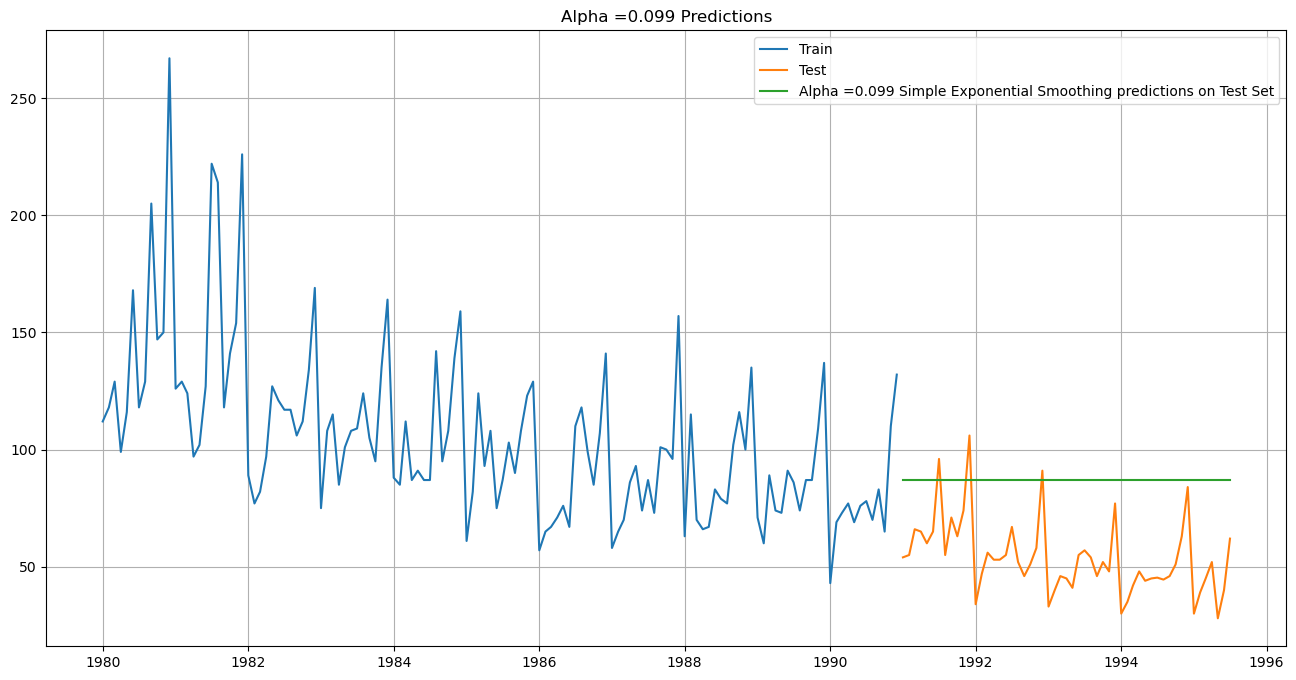

In [68]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.099 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.099 Predictions');

### Model Evaluation

In [69]:
## Test Data

rmse_SES_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.099 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %0.3f" %(rmse_SES_test_1))

For Alpha =0.099 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.820


In [70]:
resultsDf.loc['alpha:0.099 SES model'] = {'Test RMSE' : rmse_SES_test_1}

In [71]:
resultsDf

Test RMSE
RegressionOnTime                 71.617332
NaiveModel                       79.741326
SimpleAverage                    53.483727
2pointTrailingMovingAverageBest  11.529811
alpha:0.099 SES model            36.819844

Performance on other alpha values can be checked manually. Here we have created a loop for picking up the alpha values and return the RMSE value for that alpha

In [72]:
## First we will define an empty dataframe to store our values from the loop

results_alpha = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
results_alpha

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [73]:
for i in np.arange(0,0.15,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    results_alpha = results_alpha.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

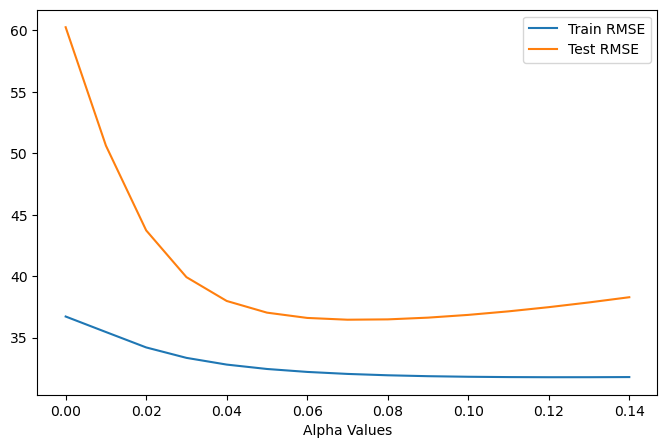

In [74]:
_,ax = plt.subplots(figsize = [8,5])
results_alpha.set_index('Alpha Values').plot(ax=ax);

In [75]:
results_alpha.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
7           0.07   32.046904  36.459396
8           0.08   31.936243  36.486588
6           0.06   32.209657  36.604090
9           0.09   31.862435  36.627739
10          0.10   31.815610  36.851649
5           0.05   32.449102  37.035061
11          0.11   31.789107  37.140027
12          0.12   31.778255  37.481064
13          0.13   31.779675  37.866403
4           0.04   32.806672  37.985252
14          0.14   31.790845  38.289664
3           0.03   33.353562  39.924766
2           0.02   34.203362  43.730326
1           0.01   35.456769  50.629800
0           0.00   36.719452  60.266353

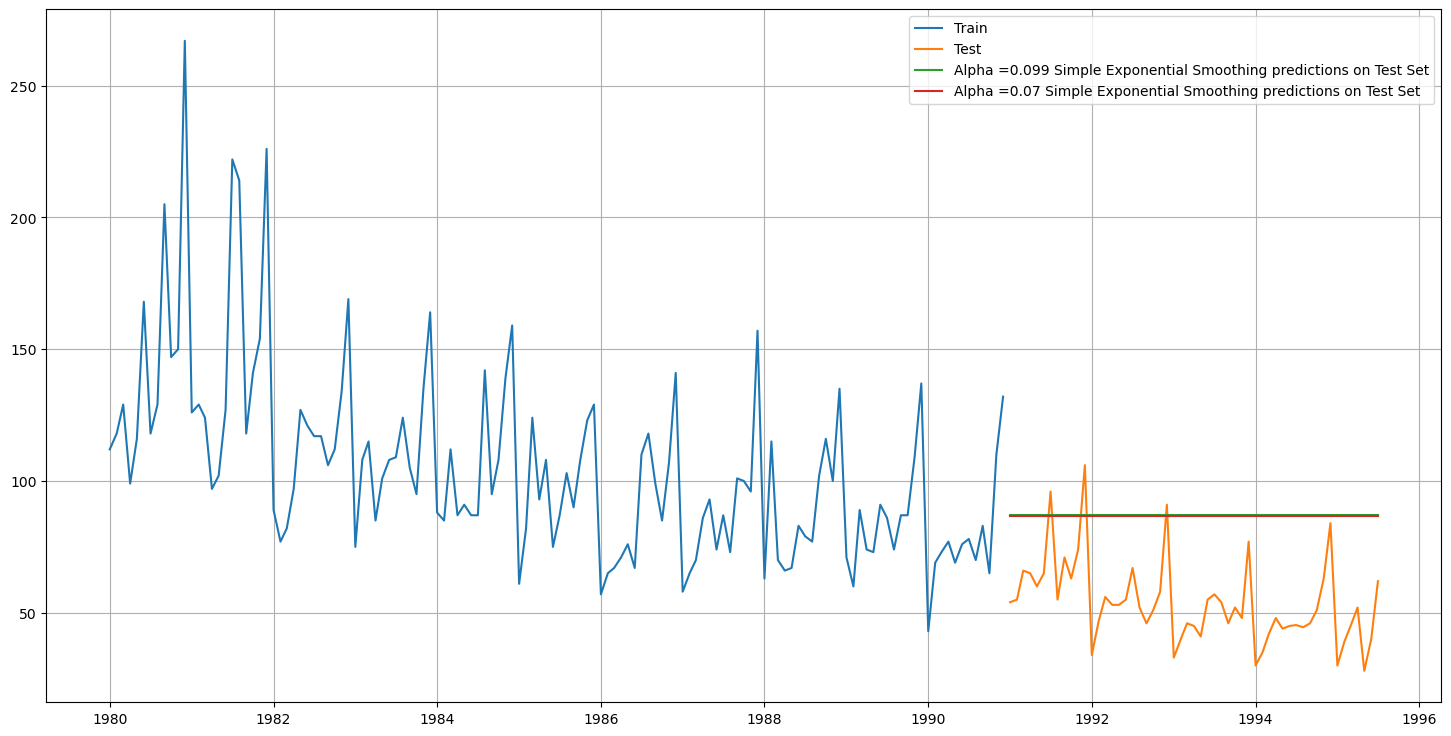

In [76]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.099 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.07], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [77]:
## Test Data

rmse_SES_test_2 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',0.07],squared=False)
print("For Alpha =0.07 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %0.3f" %(rmse_SES_test_2))

For Alpha =0.07 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.459


In [78]:
resultsDf.loc['alpha:0.07 SES model'] = {'Test RMSE' : rmse_SES_test_2}

In [79]:
resultsDf

Test RMSE
RegressionOnTime                 71.617332
NaiveModel                       79.741326
SimpleAverage                    53.483727
2pointTrailingMovingAverageBest  11.529811
alpha:0.099 SES model            36.819844
alpha:0.07 SES model             36.459396

## Model 6: Double exponential smoothing method

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [80]:
DES_train = train.copy()
DES_test = test.copy()

In [81]:
model_DES = Holt(DES_train['Rose'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
model_DES_autofit = model_DES.fit(optimized=True)

In [83]:
model_DES_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head().round()

Rose  predict
YearMonth                
1991-01-01  54.0     73.0
1991-02-01  55.0     73.0
1991-03-01  66.0     72.0
1991-04-01  65.0     72.0
1991-05-01  60.0     71.0

### Model Evaluation

In [85]:
## Test Data

rmse_DES_test_1 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha =0.0175,beta = 3.23e-05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %0.3f" %(rmse_DES_test_1))

For Alpha =0.0175,beta = 3.23e-05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 15.716


In [86]:
resultsDf.loc['alpha:0.0175,beta:3.23e-05 DES model'] = {'Test RMSE' : rmse_DES_test_1}

In [87]:
resultsDf

Test RMSE
RegressionOnTime                      71.617332
NaiveModel                            79.741326
SimpleAverage                         53.483727
2pointTrailingMovingAverageBest       11.529811
alpha:0.099 SES model                 36.819844
alpha:0.07 SES model                  36.459396
alpha:0.0175,beta:3.23e-05 DES model  15.716250

Since trend component is coming out to be negligible we can simply ignore the trend component and apply a loop only for the level of Time Series in forecasting

In [88]:
## First we will define an empty dataframe to store our values from the loop

results_alpha_beta = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
results_alpha_beta

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [89]:
### RUN THIS IF YOU WANT TO SEARCH AGAIN #####


# for i in np.arange(0.0,0.40,.01):
#     for j in np.arange(0.03,.11,0.01):
#         i= i.round(2)
#         j= j.round(5)
#         model_DES_alpha_i = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
#         DES_train['predict',i,j] = model_DES_alpha_i.fittedvalues
#         DES_test['predict',i,j] = model_DES_alpha_i.forecast(steps=55)

#         rmse_DES_train_i_j = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)

#         rmse_DES_test_i_j = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)

#         results_alpha_beta = results_alpha_beta.append({'Alpha Values': i,
#                                                         'Beta Values': j,
#                                                         'Train RMSE':rmse_DES_train_i_j,
#                                                         'Test RMSE':rmse_DES_test_i_j}, ignore_index=True)


In [90]:
i=0.04
j=0.04
model_DES_alpha_i = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
DES_train['predict',i,j] = model_DES_alpha_i.fittedvalues
DES_test['predict',i,j] = model_DES_alpha_i.forecast(steps=55)

rmse_DES_train_i_j = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)

rmse_DES_test_i_j = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)

results_alpha_beta = results_alpha_beta.append({'Alpha Values': i,
                                                'Beta Values': j,
                                                'Train RMSE':rmse_DES_train_i_j,
                                                'Test RMSE':rmse_DES_test_i_j}, ignore_index=True)

In [91]:
results_alpha_beta.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0          0.04         0.04   61.520373  14.891774

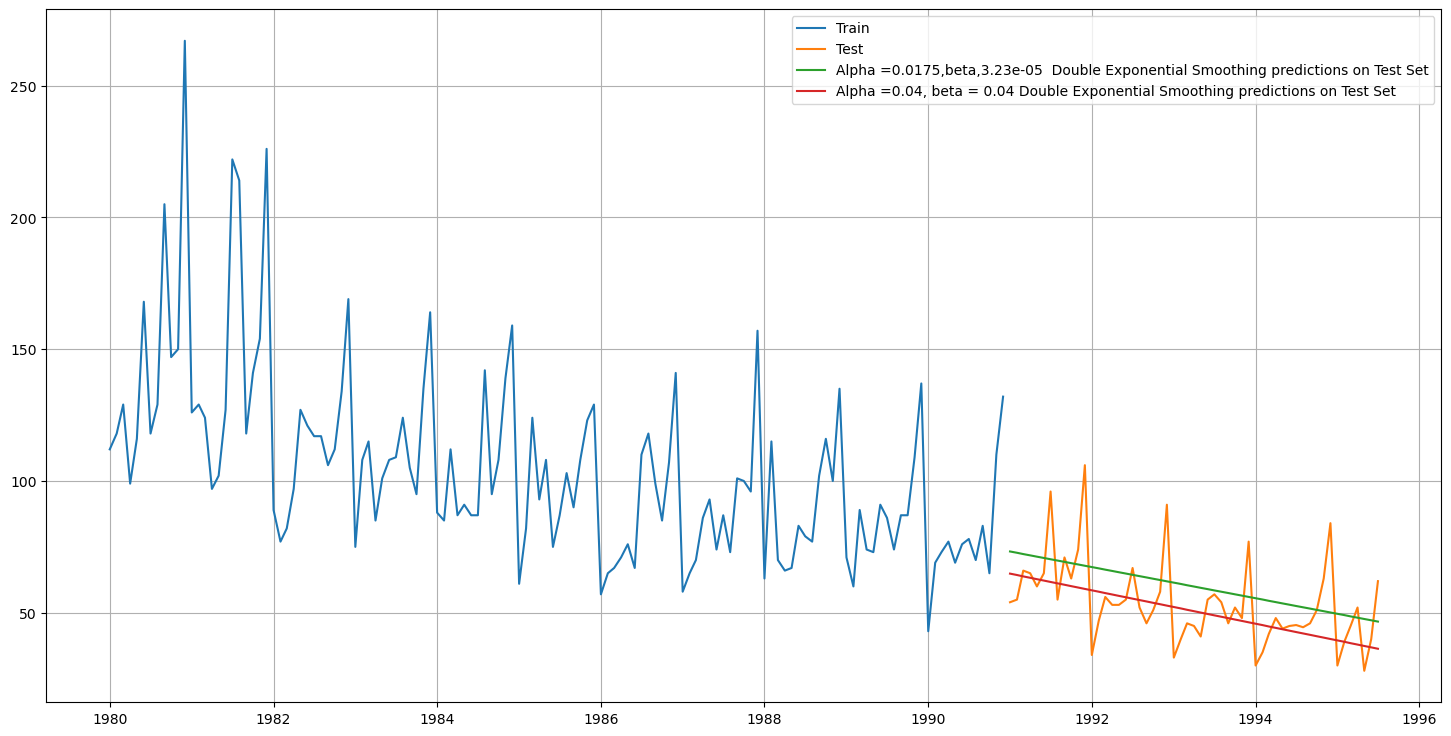

In [92]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.0175,beta,3.23e-05  Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict',0.04,0.04], label='Alpha =0.04, beta = 0.04 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

### Model Evalaution after searching parameters

In [93]:
## Test Data

rmse_DES_test_2 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',0.04,0.04],squared=False)
print("For Alpha =0.1,beta=0.01 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %0.3f" %(rmse_DES_test_2))

For Alpha =0.1,beta=0.01 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 14.892


In [94]:
resultsDf.loc['alpha:0.04,beta:0.04 DES model'] = {'Test RMSE' : rmse_DES_test_2}

In [95]:
resultsDf

Test RMSE
RegressionOnTime                      71.617332
NaiveModel                            79.741326
SimpleAverage                         53.483727
2pointTrailingMovingAverageBest       11.529811
alpha:0.099 SES model                 36.819844
alpha:0.07 SES model                  36.459396
alpha:0.0175,beta:3.23e-05 DES model  15.716250
alpha:0.04,beta:0.04 DES model        14.891774

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [96]:
TES_train = train.copy()
TES_test = test.copy()

In [97]:
model_TES = ExponentialSmoothing(endog=TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='MS')

In [98]:
model_TES_autofit = model_TES.fit()

In [99]:
model_TES_autofit.params

{'smoothing_level': 0.0715106306609405,
 'smoothing_trend': 0.04529179757535142,
 'smoothing_seasonal': 7.244325029450242e-05,
 'damping_trend': nan,
 'initial_level': 130.40839142502193,
 'initial_trend': -0.77985743179386,
 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
        1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
        1.44724625, 1.99553681]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [100]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head().round()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0          56.0
1991-02-01  55.0          64.0
1991-03-01  66.0          69.0
1991-04-01  65.0          60.0
1991-05-01  60.0          68.0

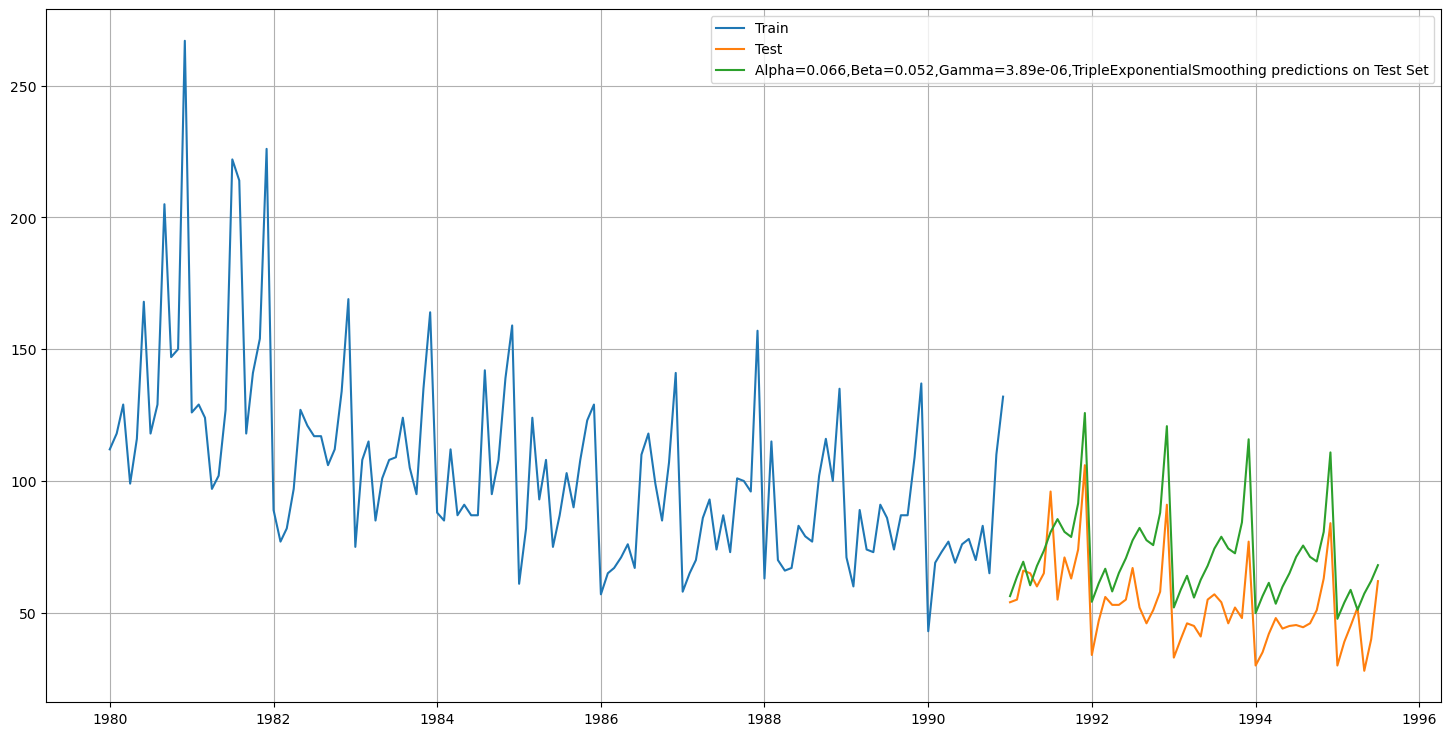

In [101]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.066,Beta=0.052,Gamma=3.89e-06,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [102]:
## Test Data

rmse_TES_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.066,Beta=0.052,Gamma=3.89e-06, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_TES_test_1))

For Alpha=0.066,Beta=0.052,Gamma=3.89e-06, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.188


In [103]:
results_TES_test_1 = pd.DataFrame({'Test RMSE': [rmse_TES_test_1]}
                           ,index=['Alpha=0.066,Beta=0.052,Gamma=3.89e-06,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, results_TES_test_1])
resultsDf

Test RMSE
RegressionOnTime                                    71.617332
NaiveModel                                          79.741326
SimpleAverage                                       53.483727
2pointTrailingMovingAverageBest                     11.529811
alpha:0.099 SES model                               36.819844
alpha:0.07 SES model                                36.459396
alpha:0.0175,beta:3.23e-05 DES model                15.716250
alpha:0.04,beta:0.04 DES model                      14.891774
Alpha=0.066,Beta=0.052,Gamma=3.89e-06,TripleExp...  20.188027

In [104]:
## First we will define an empty dataframe to store our values from the loop

results_alpha_beta_gamma = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
results_alpha_beta_gamma

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [105]:
#### RUN THIS IF YOU WANT TO SEARCH AGAIN #####


# for i in np.arange(0.03,.2,0.01):
#     for j in np.arange(0.03,0.2,0.01):
#         for k in np.arange(0.003,.02,0.001):
#             i = round(i,2)
#             j= round(j,2)
#             k = round(k,3)
#             model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
#             TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
#             TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
#             rmse_TES_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
#             rmse_TES_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
#             results_alpha_beta_gamma = results_alpha_beta_gamma.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
#                                                   'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
#                                                  , ignore_index=True)

In [106]:
i = 0.10
j = 0.19
k = 0.019

model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)

rmse_TES_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)

rmse_TES_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)

results_alpha_beta_gamma = results_alpha_beta_gamma.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                      'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
                                     , ignore_index=True)

In [107]:
results_alpha_beta_gamma.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0           0.1         0.19         0.019   19.493593   9.195803

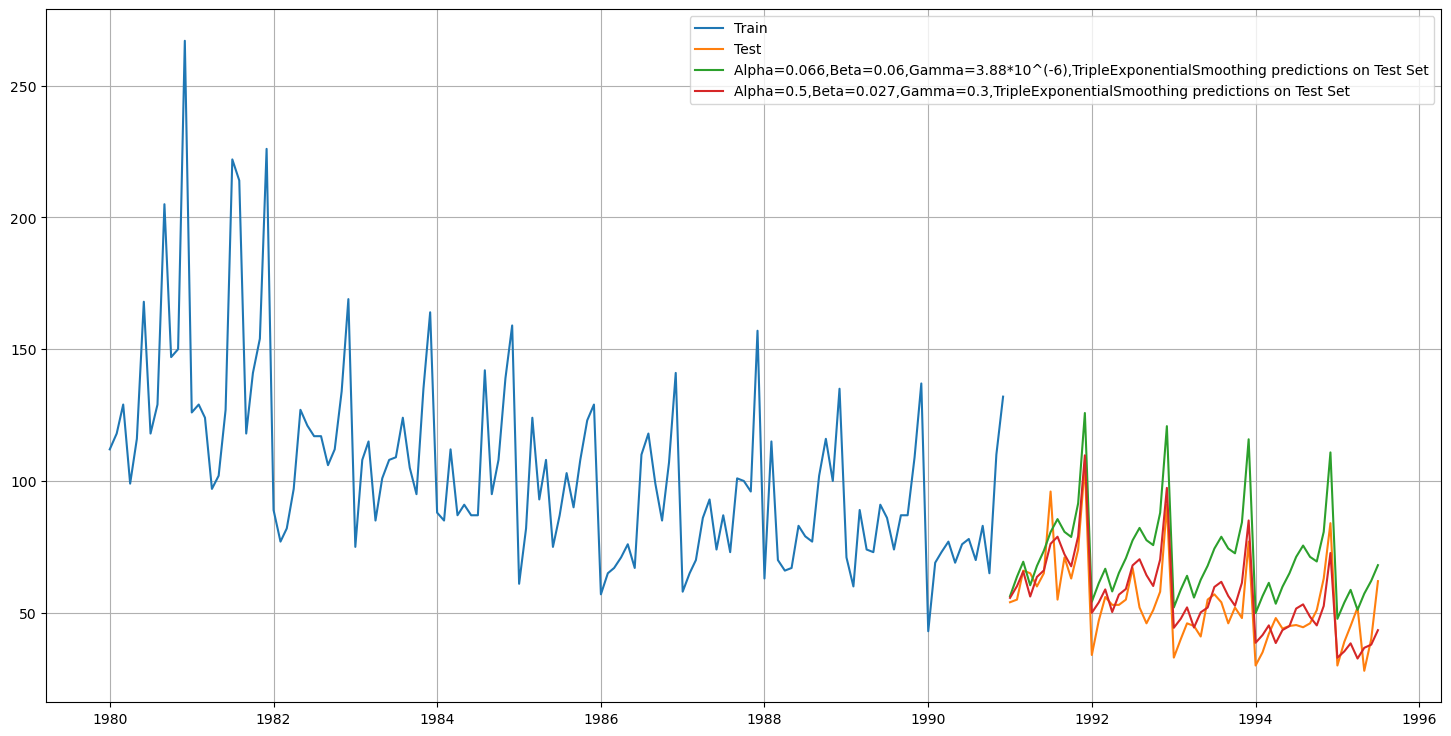

In [108]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['auto_predict'], label='Alpha=0.066,Beta=0.06,Gamma=3.88*10^(-6),TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.10, 0.19, 0.019], label='Alpha=0.5,Beta=0.027,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

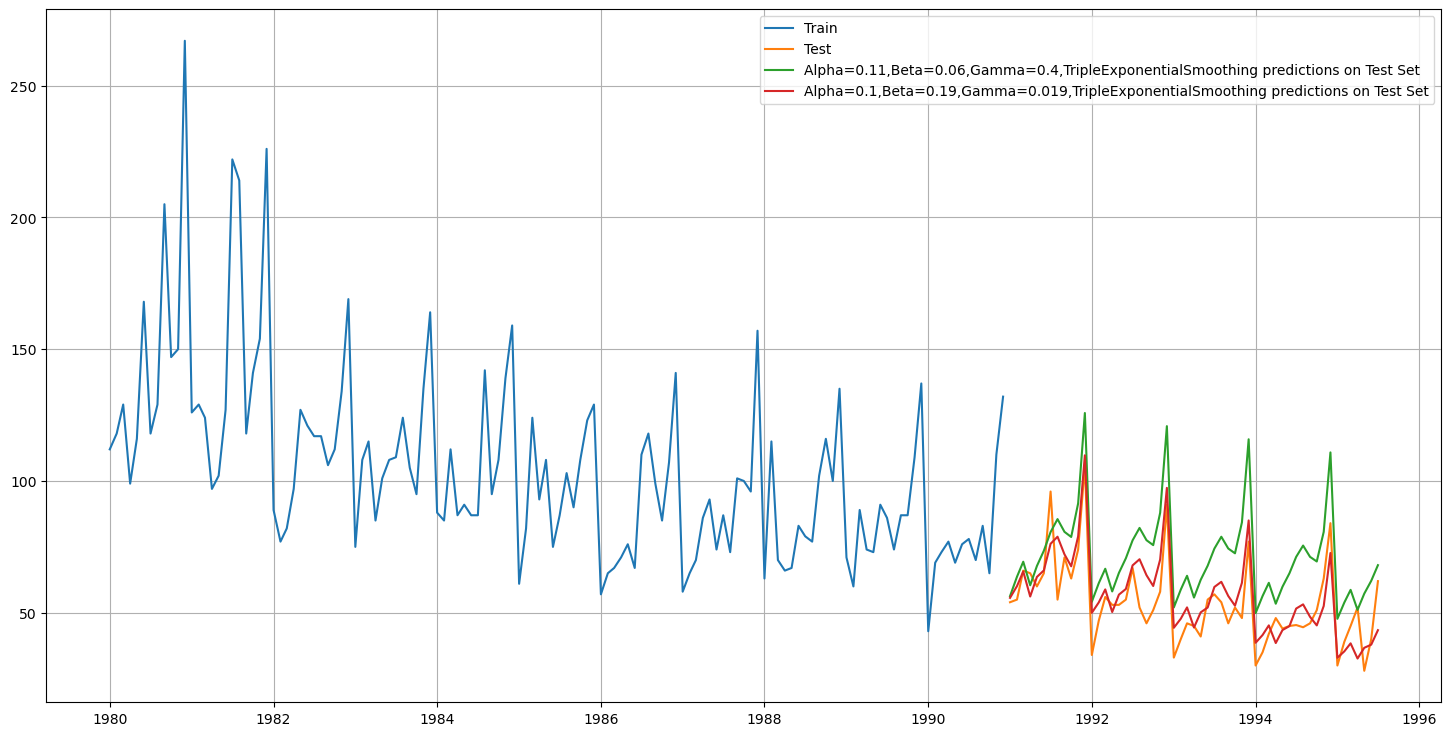

In [109]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['auto_predict'], label='Alpha=0.11,Beta=0.06,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.10, 0.19, 0.019], label='Alpha=0.1,Beta=0.19,Gamma=0.019,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [110]:
results_TES_test_2= pd.DataFrame({'Test RMSE': [results_alpha_beta_gamma.sort_values(by=['Test RMSE']).values[0][4]]},index=['Alpha=0.10,Beta=0.19,Gamma=0.019,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, results_TES_test_2])
resultsDf

Test RMSE
RegressionOnTime                                    71.617332
NaiveModel                                          79.741326
SimpleAverage                                       53.483727
2pointTrailingMovingAverageBest                     11.529811
alpha:0.099 SES model                               36.819844
alpha:0.07 SES model                                36.459396
alpha:0.0175,beta:3.23e-05 DES model                15.716250
alpha:0.04,beta:0.04 DES model                      14.891774
Alpha=0.066,Beta=0.052,Gamma=3.89e-06,TripleExp...  20.188027
Alpha=0.10,Beta=0.19,Gamma=0.019,TripleExponent...   9.195803

***

# Check for Stationarity of Time Series

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [111]:
from statsmodels.tsa.stattools import adfuller

In [112]:
adftest = adfuller(rose,regression='ct')
print('DF test statistic is %3.3f' %adftest[0])
print('DF test p-value is' ,adftest[1])
print('Number of lags used' ,adftest[2])

DF test statistic is -2.242
DF test p-value is 0.46643710204730887
Number of lags used 13


In [113]:
# lets take difference of time series 

adftest = adfuller(rose.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %adftest[0])
print('DF test p-value is' ,adftest[1])
print('Number of lags used' ,adftest[2])

DF test statistic is -8.161
DF test p-value is 3.0341924126096874e-11
Number of lags used 12


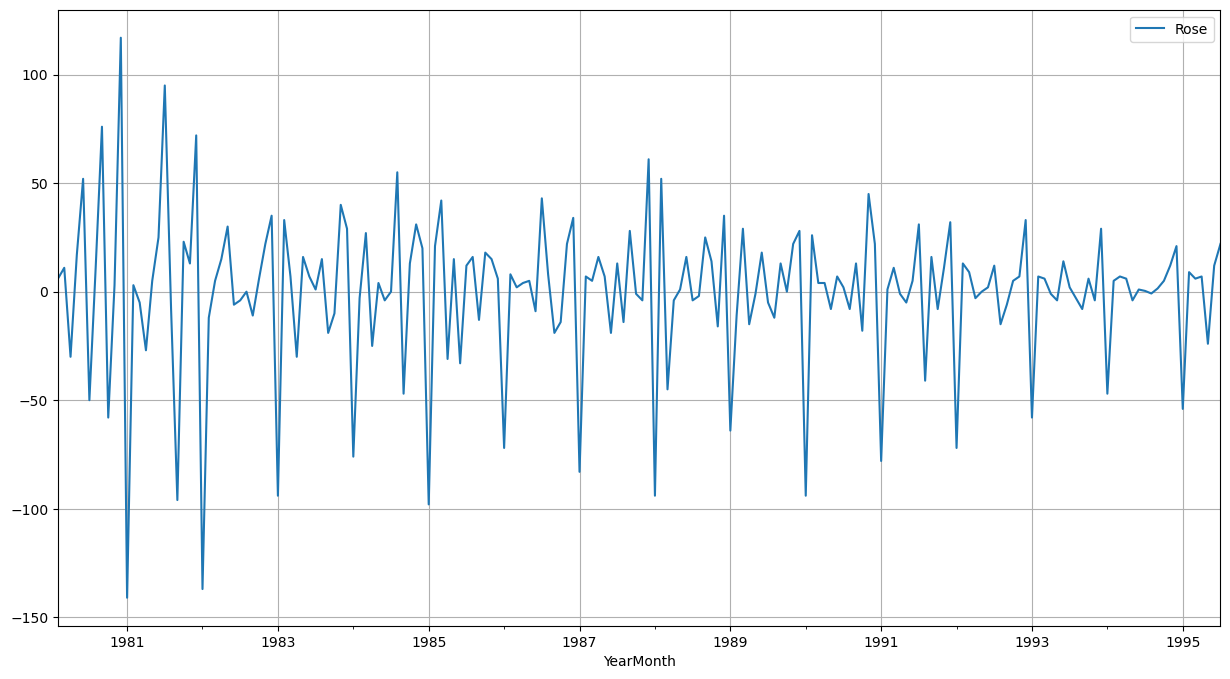

In [114]:
rose.diff().dropna().plot(grid=True);

# SARIMA MODEL (automated and based on AIC)

As we saw from previous models that there is some amount of seasonality present in the time series model

## Check for Stationarity of Train data

In [115]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

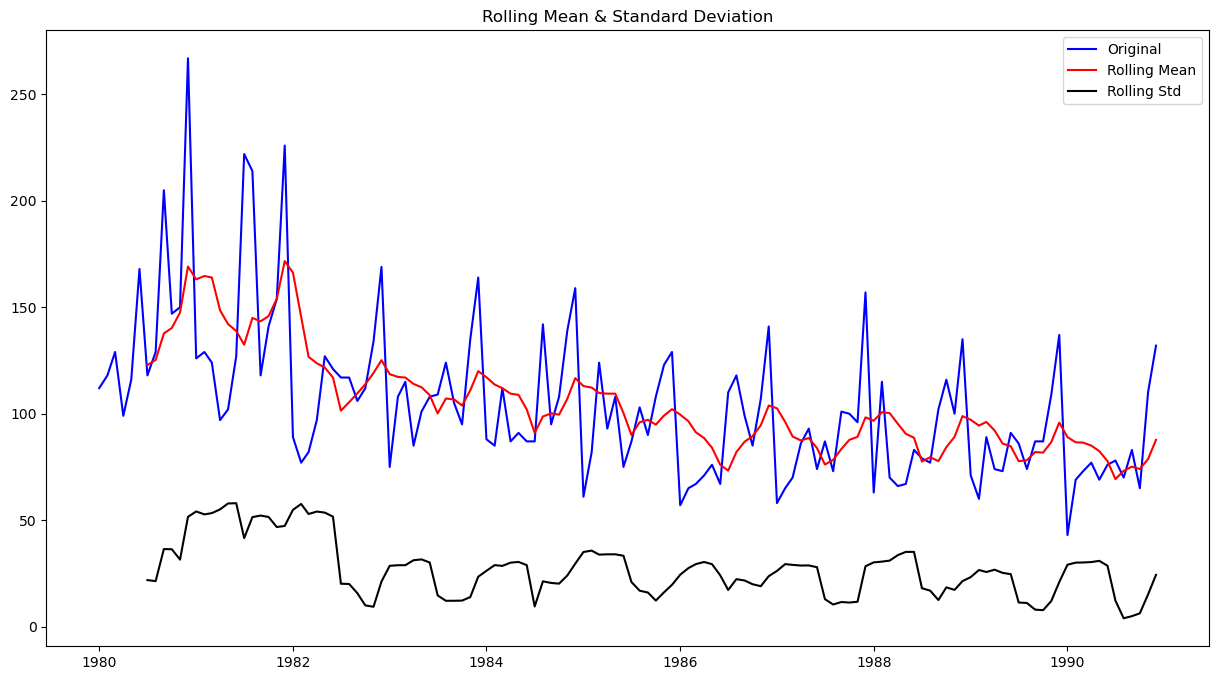

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [116]:
test_stationarity(train)

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

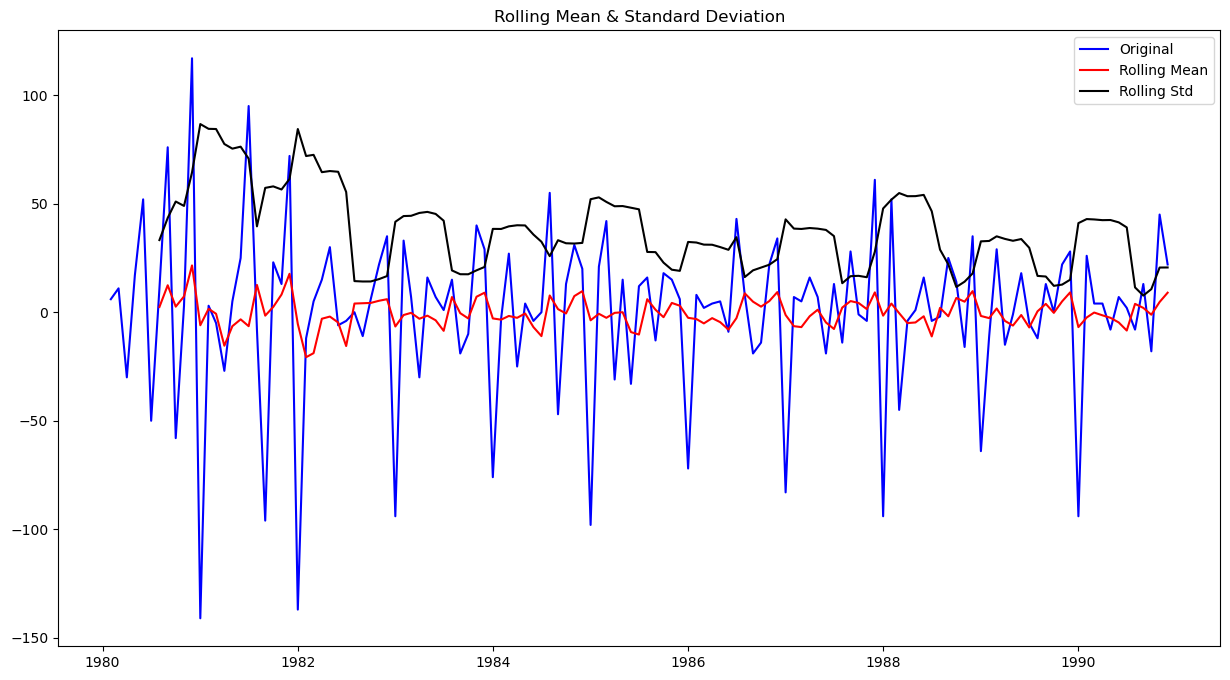

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [117]:
# lets take difference of time series 

test_stationarity(train.diff().dropna())

We see that at  $\alpha$  = 0.05 the Time Series is indeed stationary.

In [118]:
# ACF and PACF plots for different lags

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

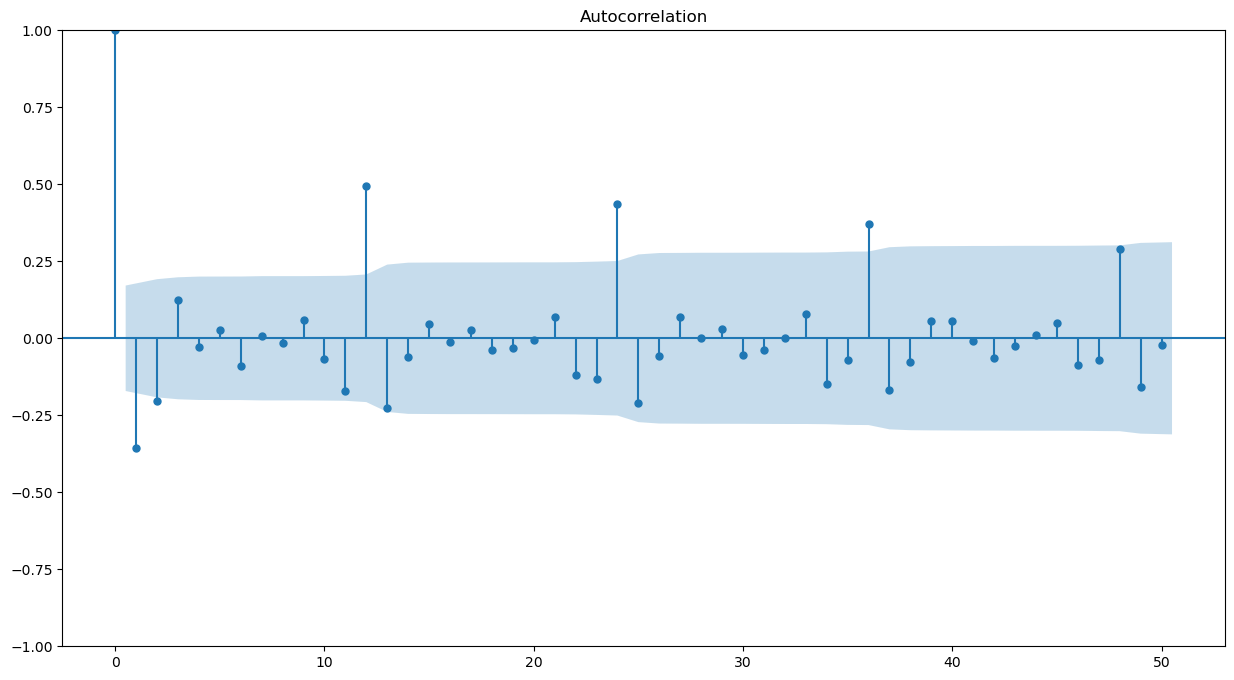

In [119]:
plot_acf(train.diff().dropna(),alpha=0.05,lags=50);# for deciding the q parameter 

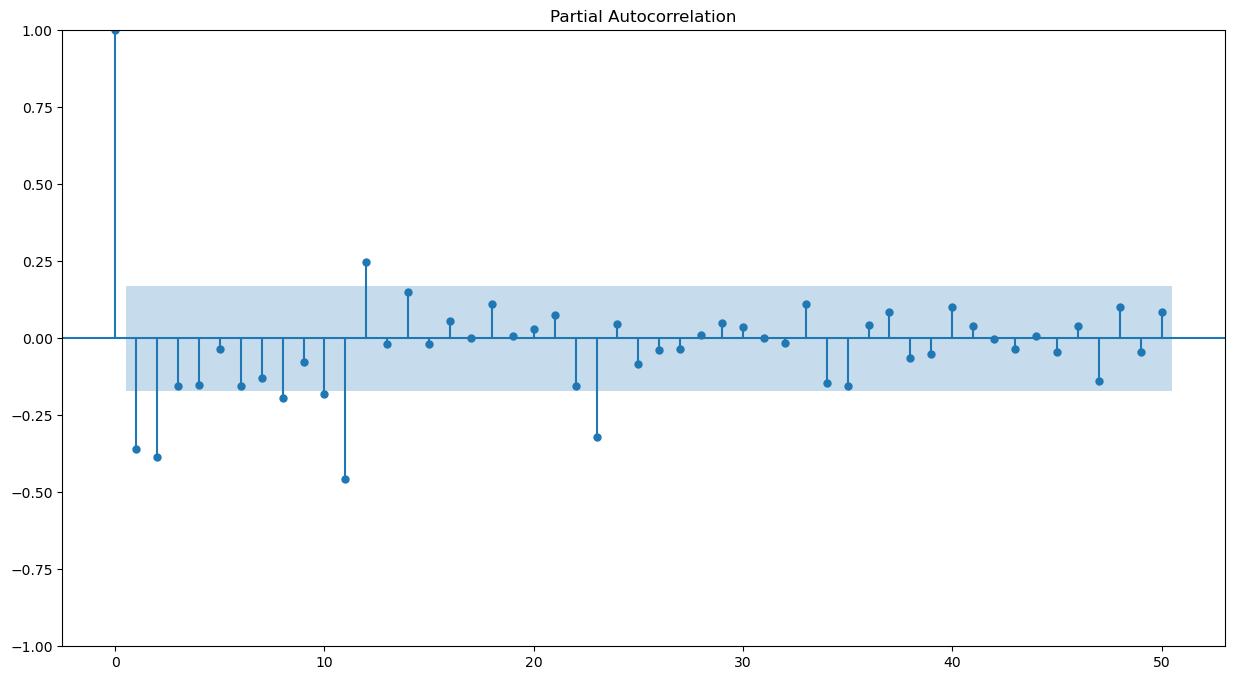

In [120]:
plot_pacf(train.diff().dropna(),alpha=0.05,lags=50); #for deciding the p parameter

In [121]:
from itertools import product

In [122]:
p =range(0,3)
q = range(0,3)
d = range(1,2)
pdq = list(product(p,d,q))
D = range(0,2)

PDQ = [(x[0], x[1], x[2], 12) for x in list(product(np.arange(0,3), D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [150]:
# SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
# SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [151]:
# #### RUN THIS ONLY FOR SEARCHING FOR PARAMETERS AGAIN #####

# import statsmodels.api as sm

# for param in pdq:
#     for param_seasonal in PDQ:
#         SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)
            
#         results_SARIMA = SARIMA_model.fit(maxiter=1000)
#         print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
#         SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.42308272074
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380899
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301627294
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014776145
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385924
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635755186
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601663
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182654732
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697527


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945709
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.5132698374416
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390729143626
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244225803
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918327
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.631404938384
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.7663133563515
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.0730606717417
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.9032809267709
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918082
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947779
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483303895
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.2456655529988
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:929.3362488520096
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.7161670278343
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.598286653578
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461662
SARIMA(0, 1, 1)x(2, 0, 2,

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:785.8335672996533
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.91021161467
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.96435525982
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311106546
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1099.4823964820687
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:904.7004130504147
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:784.1409649599236
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713670516
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909355995144
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488806142
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:925.3705668007888
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:915.6932510965446
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:785.8286084315407
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464449209528
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781888485805
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687982642934
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:794.779944294303
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:783.7036522832664
SARIMA(2, 1, 2)x(2, 1, 2, 12

In [125]:
# SARIMA_AIC.sort_values(by=['AIC']).head()

In [126]:
# for param = (0, 1, 2) ,param_Seasonal = (2, 1, 2, 12) AIC comes out to be: 774.969120
import statsmodels.api as sm
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Wed, 05 Apr 2023   AIC                            774.969
Time:                                    16:56:47   BIC                            792.622
Sample:                                01-01-1980   HQIC                           782.094
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

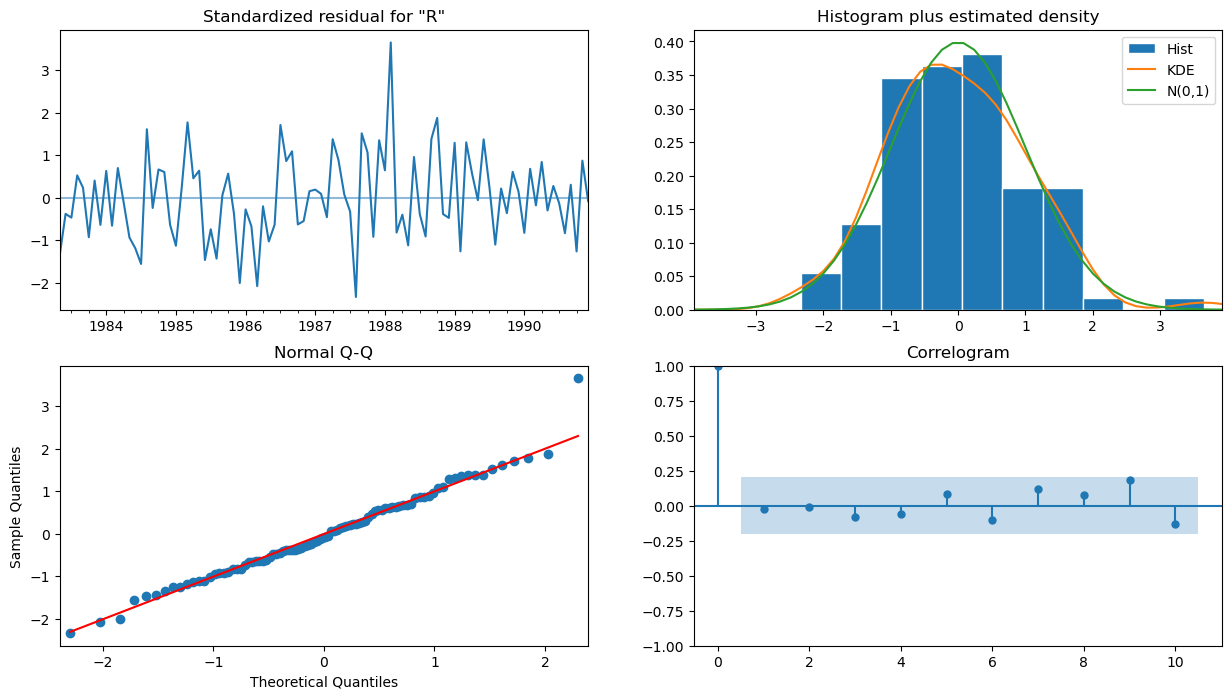

In [127]:
results_auto_SARIMA.plot_diagnostics();

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots

### Predict on the Test Set using this model and evaluate the model

In [128]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=55)

In [129]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  44.213778  14.221642      16.339871      72.087685
1991-02-01  62.326881  14.300403      34.298605      90.355156
1991-03-01  67.313431  14.302305      39.281427      95.345434
1991-04-01  63.161176  14.305207      35.123485      91.198867
1991-05-01  66.474215  14.310578      38.425997      94.522432

In [130]:
results_SARIMA_auto= pd.DataFrame({'Test RMSE':[metrics.mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)]},
                                 index=['SARIMA(0, 1, 2)(2, 1, 2, 12)'])

resultsDf = pd.concat([resultsDf, results_SARIMA_auto])
resultsDf

Test RMSE
RegressionOnTime                                    71.617332
NaiveModel                                          79.741326
SimpleAverage                                       53.483727
2pointTrailingMovingAverageBest                     11.529811
alpha:0.099 SES model                               36.819844
alpha:0.07 SES model                                36.459396
alpha:0.0175,beta:3.23e-05 DES model                15.716250
alpha:0.04,beta:0.04 DES model                      14.891774
Alpha=0.066,Beta=0.052,Gamma=3.89e-06,TripleExp...  20.188027
Alpha=0.10,Beta=0.19,Gamma=0.019,TripleExponent...   9.195803
SARIMA(0, 1, 2)(2, 1, 2, 12)                        16.523110

# Check for Stationarity of whole Time Series

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

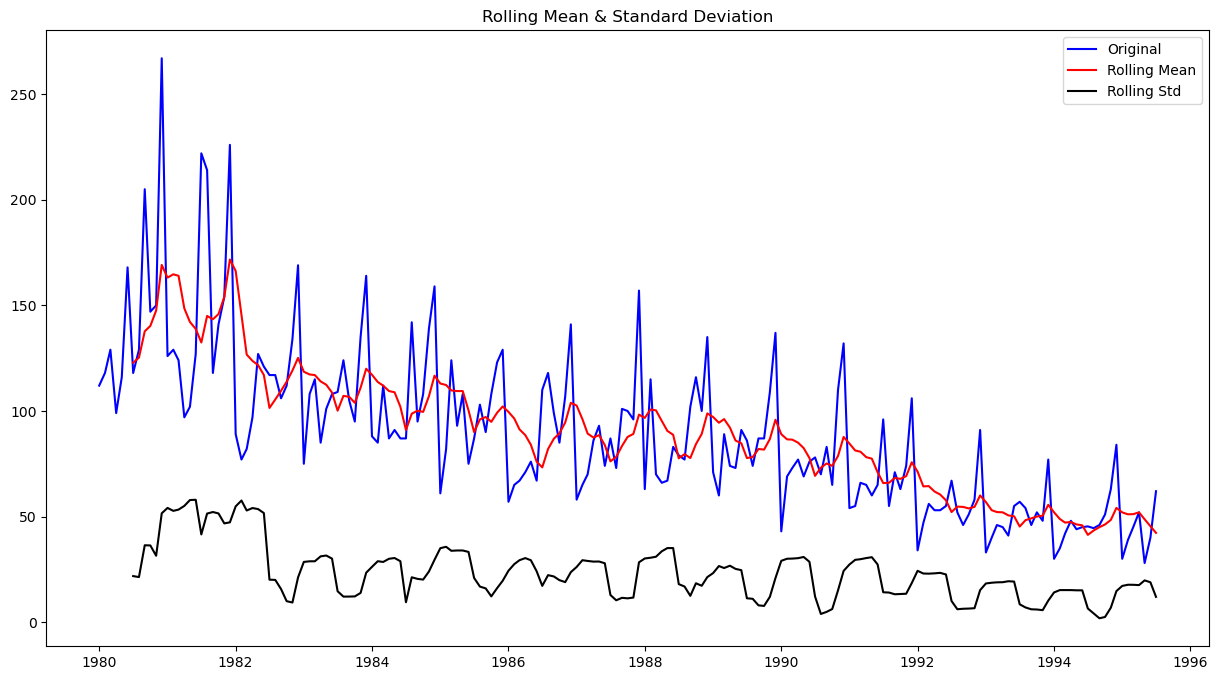

Results of Dickey-Fuller Test:
Test Statistic                  -1.873307
p-value                          0.344721
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [131]:
test_stationarity(rose)

We see that at 5% significant level the Time Series is non-stationary.

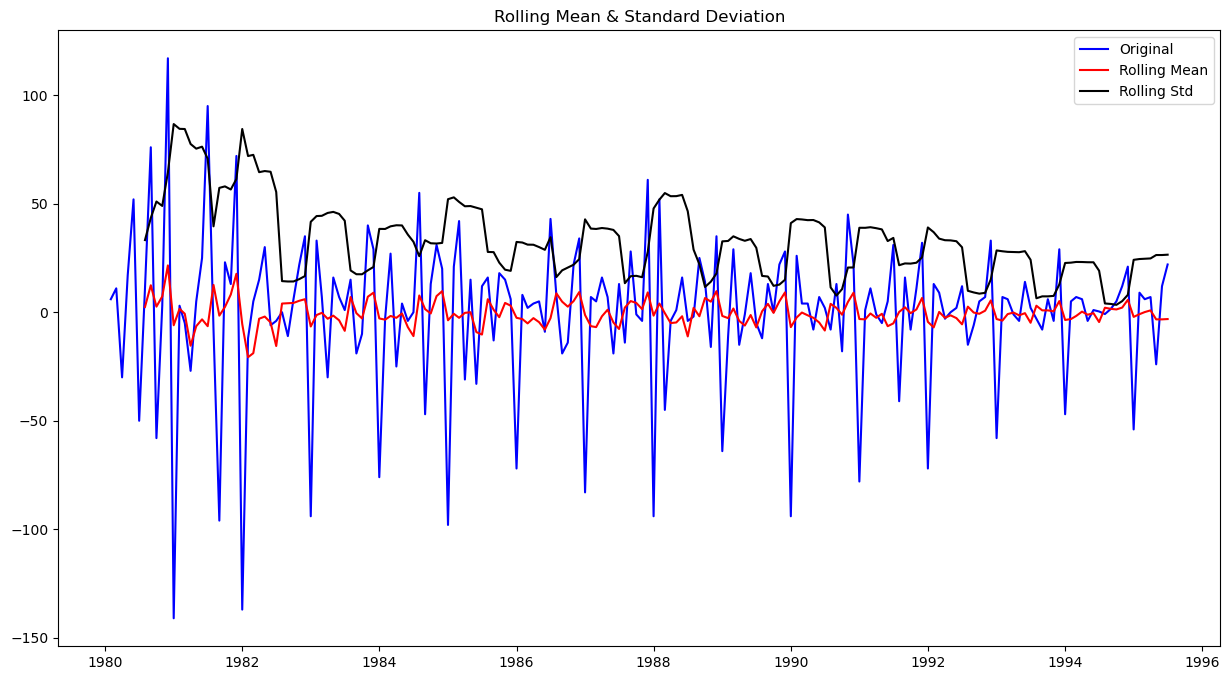

Results of Dickey-Fuller Test:
Test Statistic                -8.044136e+00
p-value                        1.813615e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [132]:
# lets take difference of time series 
test_stationarity(rose.diff().dropna())

As the p-value comes out be **< 0.05** (the significance level) we can we can reject the null hypothesis. Hence, at 0.05 significance level this difference series is stationary

## ACF and PACF PLOTS

Let us look at the ACF and the PACF plots once more.

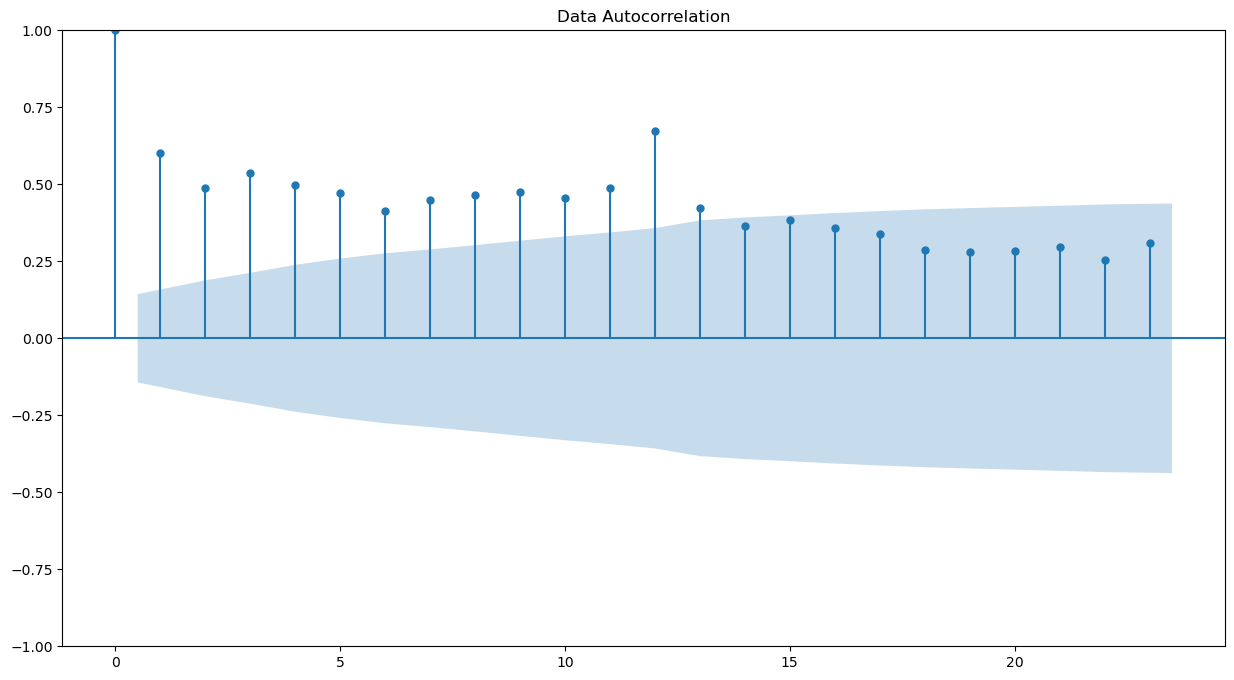

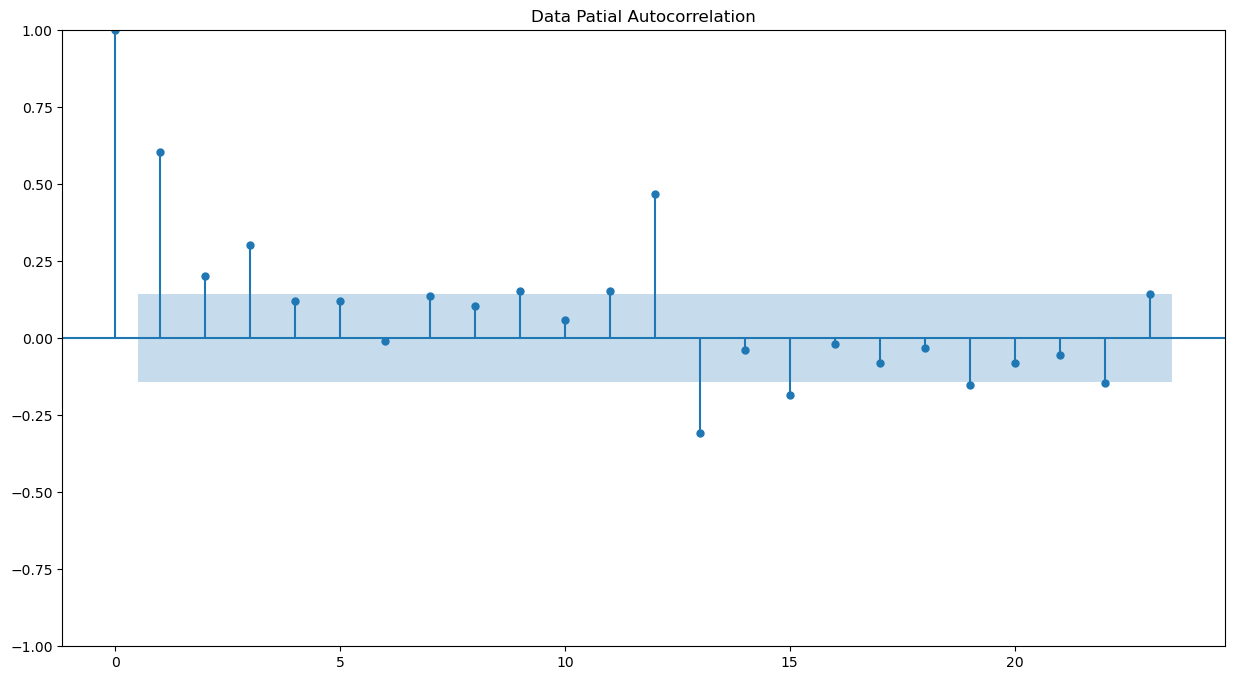

In [133]:
plot_acf(rose['Rose'],title='Data Autocorrelation')
plot_pacf(rose['Rose'],title='Data Patial Autocorrelation')
plt.show()

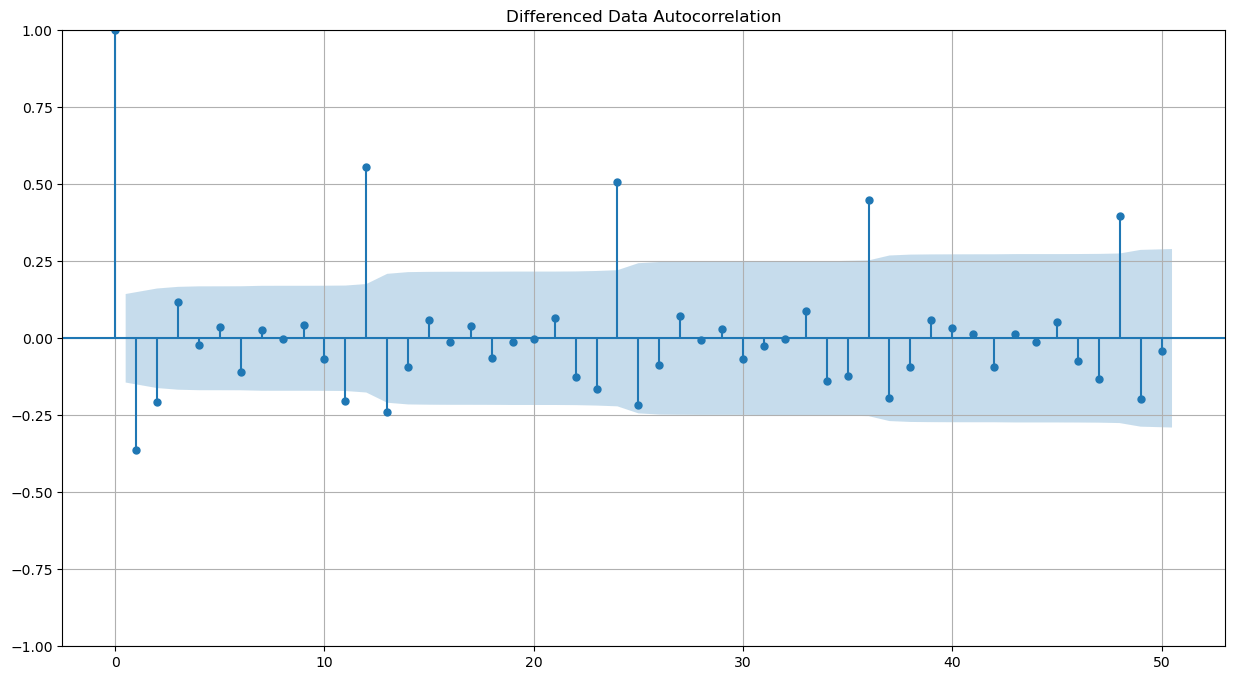

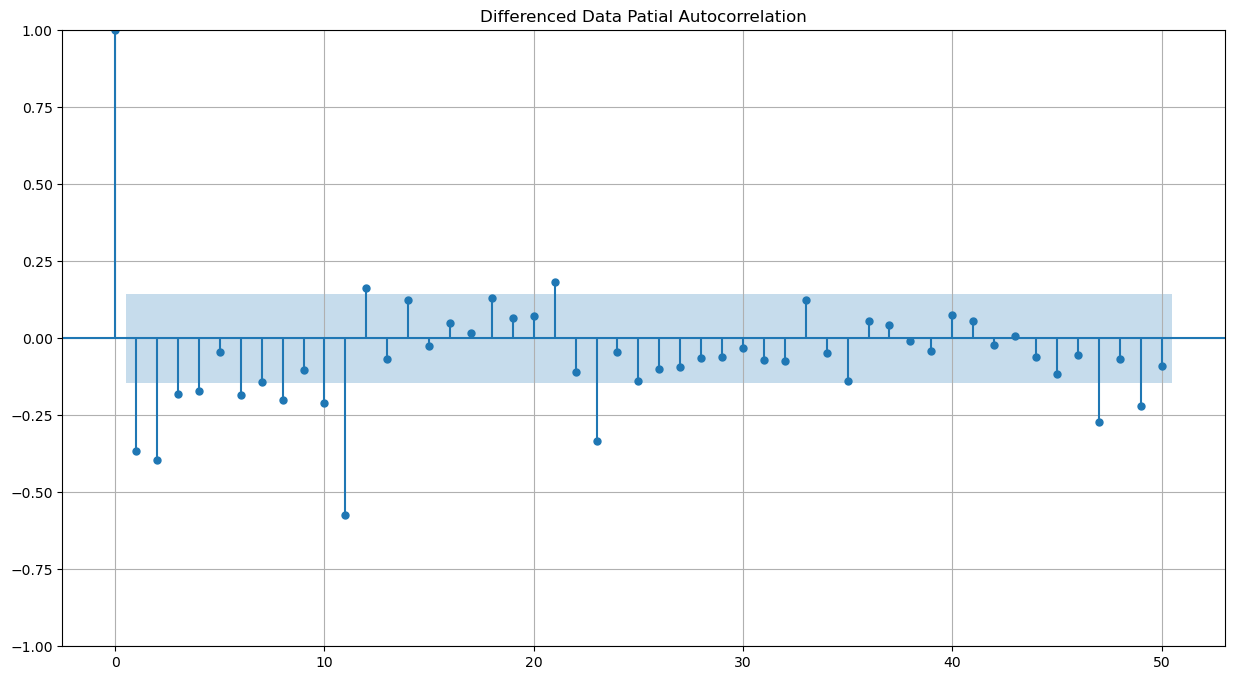

In [134]:
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.grid()
plot_pacf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.grid()
plt.show()

Before going to seasonal parameters, from the above ACF and PACF plots we can say that the **'p' parameter is 4 and 'q' parameter is 2.**

Now we can go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

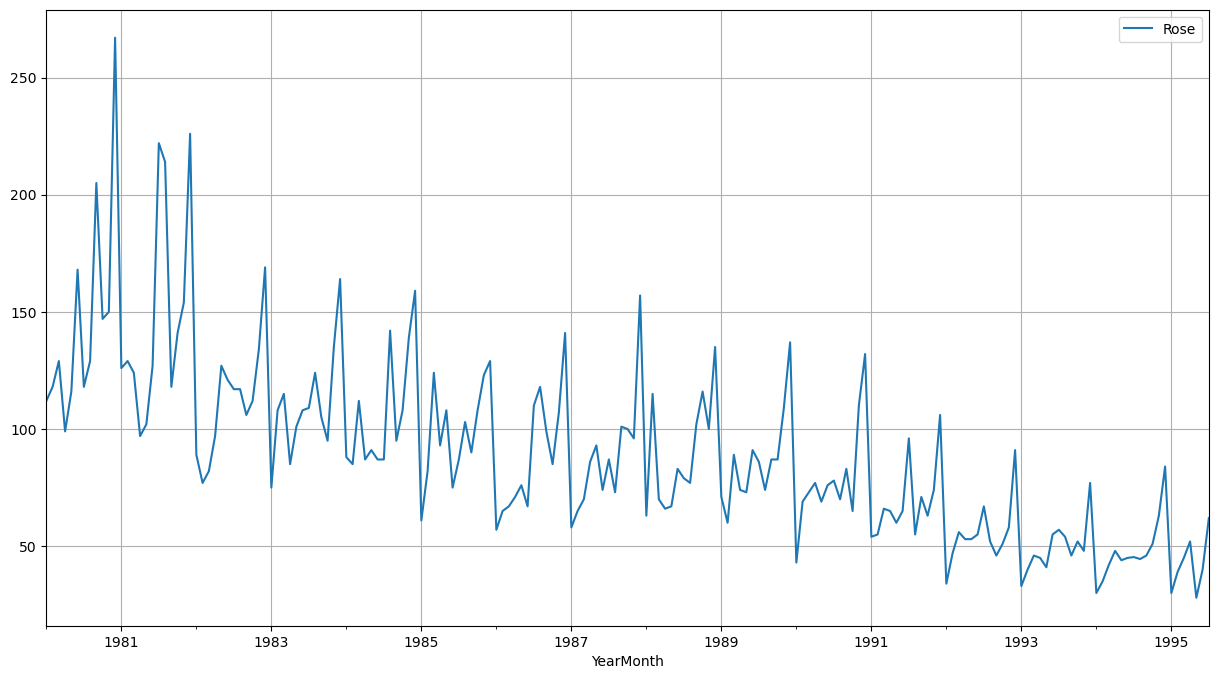

In [135]:
rose.plot()
plt.grid();

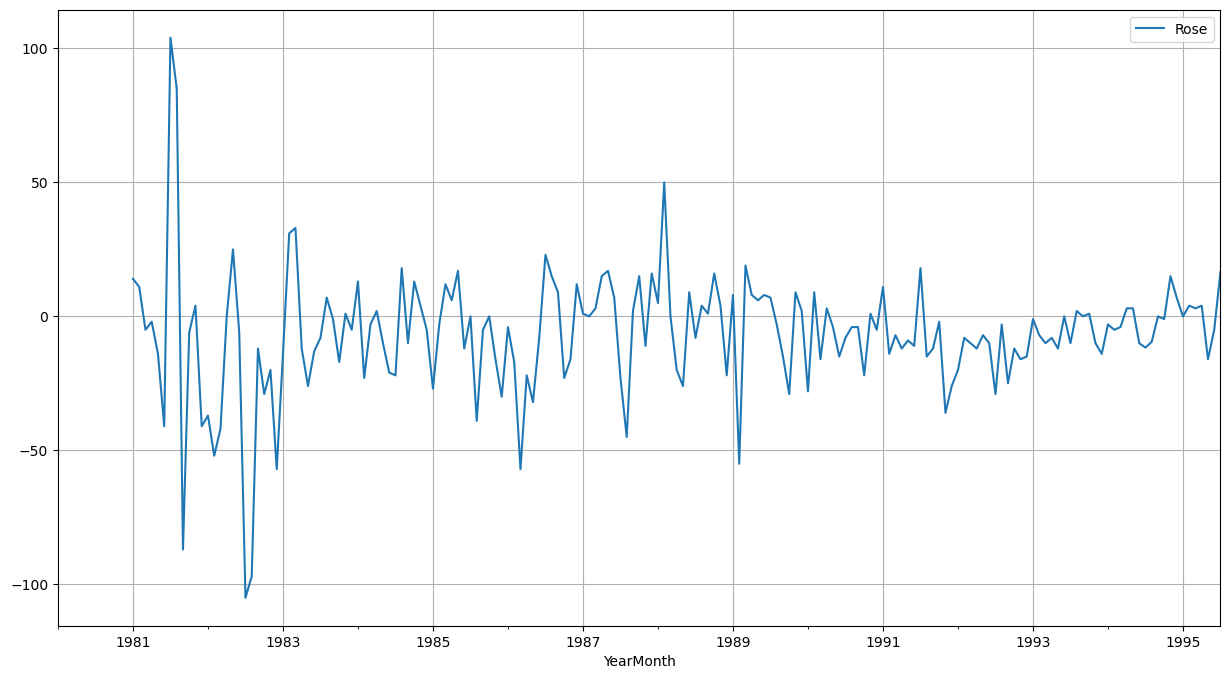

In [136]:
(rose.diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

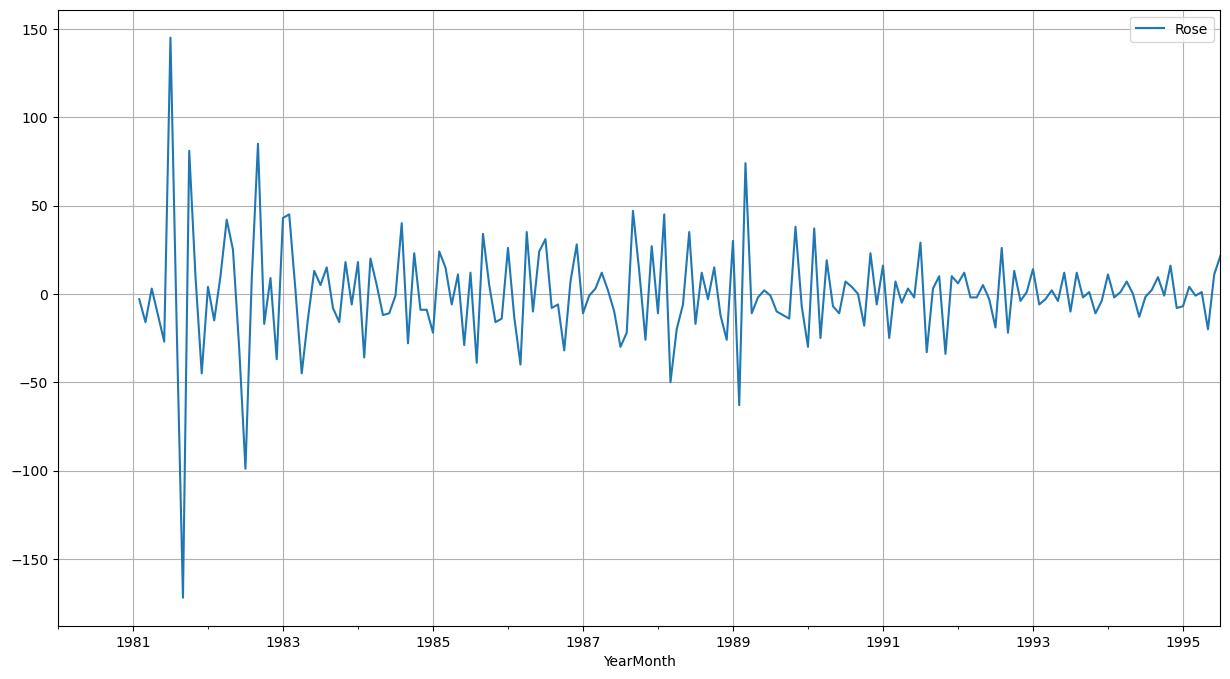

In [137]:
(rose.diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

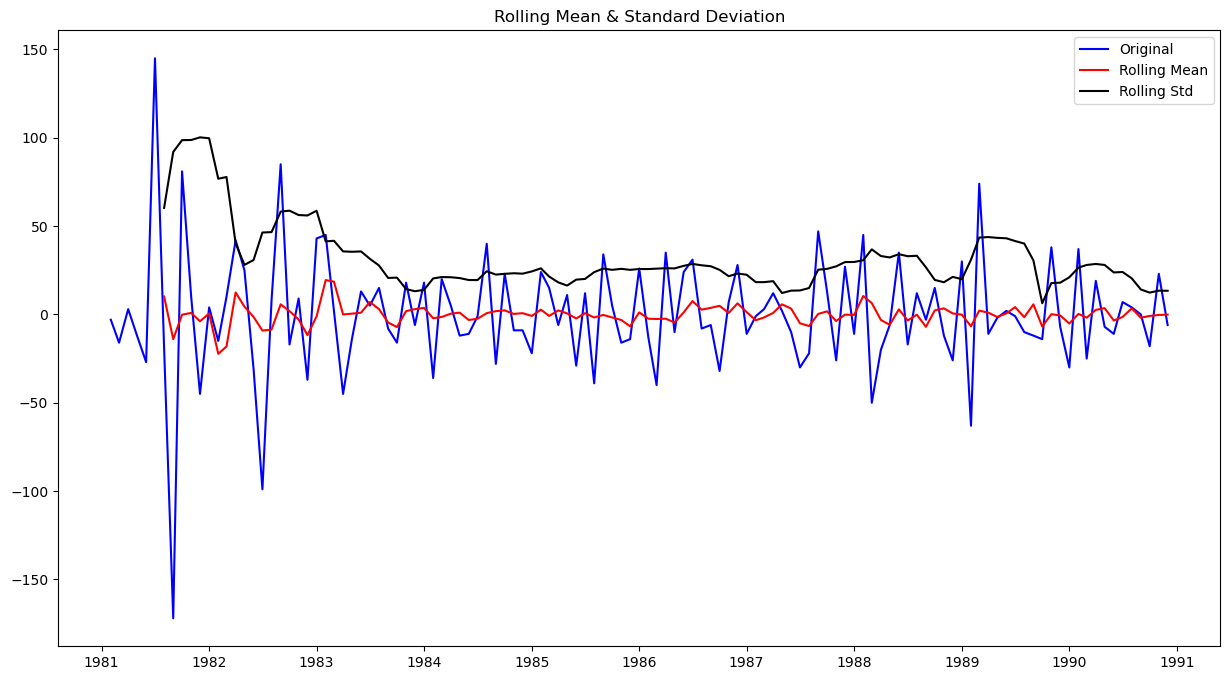

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [138]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

As the p-value is < $\alpha$ i.e. 0.05, we can reject the null hypothesis which means this time series is stationary

Checking the ACF and the PACF plots for the new modified Time Series.

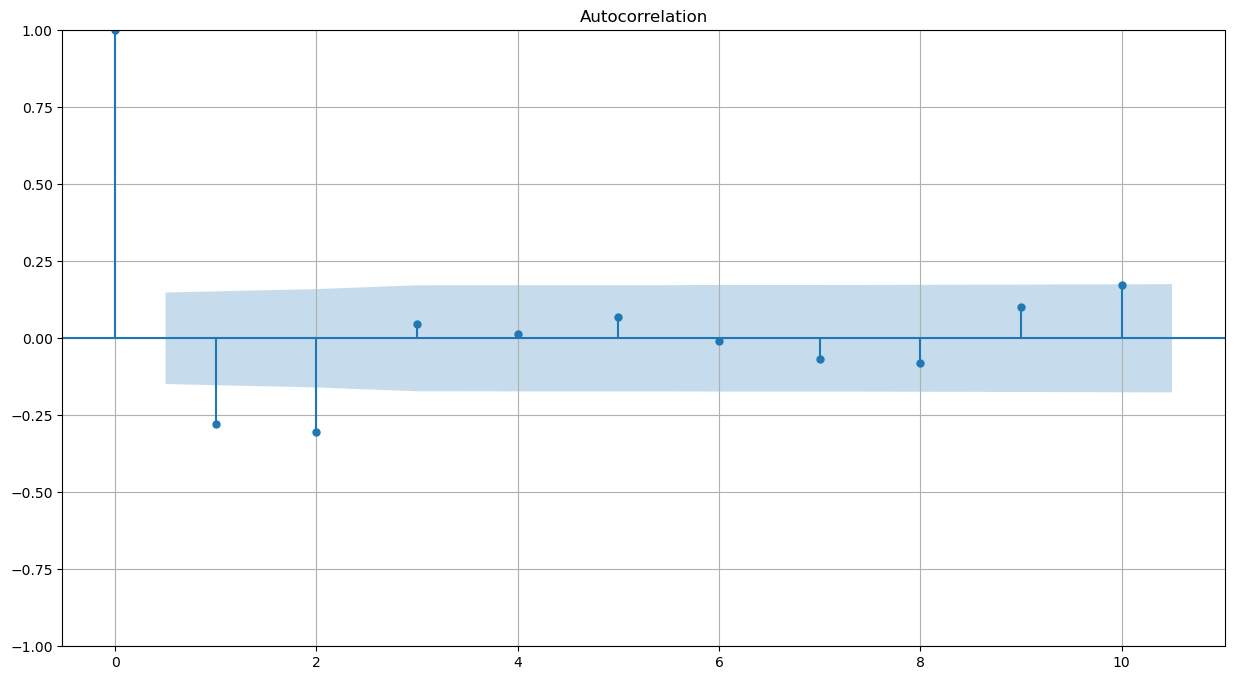

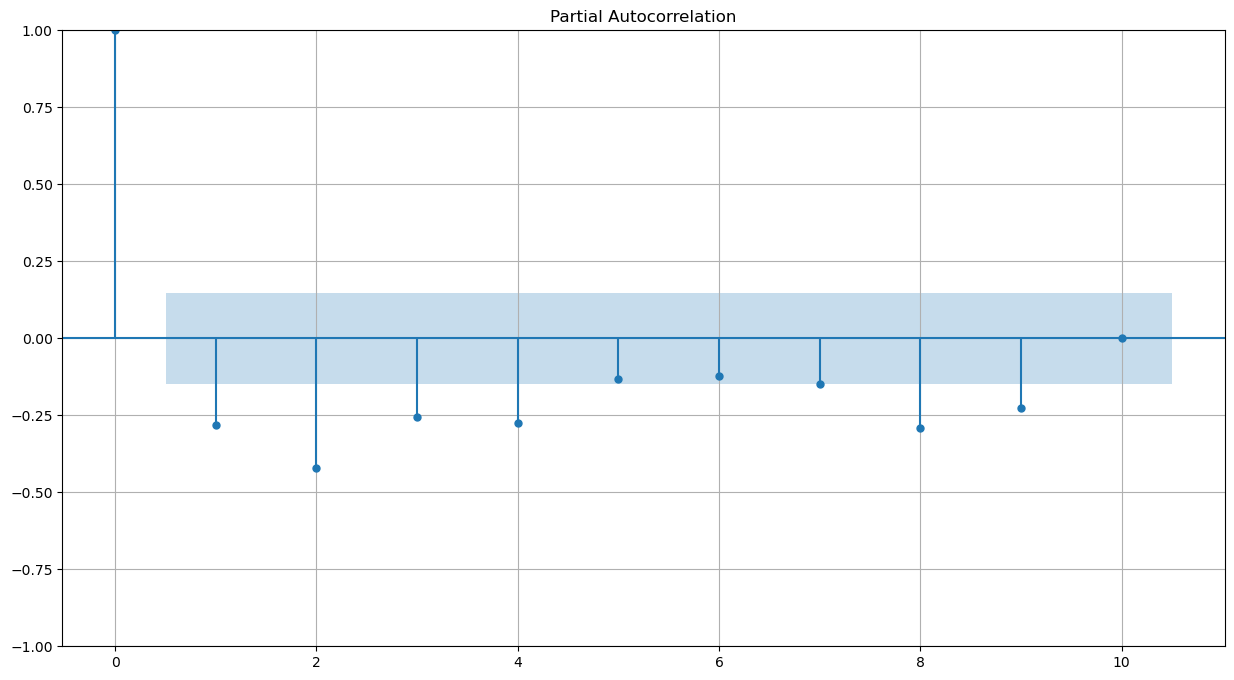

In [139]:

plot_acf((rose.diff(12).dropna()).diff(1).dropna(),lags=10);
plt.grid();
plot_pacf((rose.diff(12).dropna()).diff(1).dropna(),lags=10);
plt.grid();

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12. We will keep the p=4 and q=2.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).


In [140]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -277.661
Date:                            Wed, 05 Apr 2023   AIC                            581.322
Time:                                    16:57:13   BIC                            609.983
Sample:                                         0   HQIC                           592.663
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9743      0.189     -5.161      0.000      -1.344      -0.604
ar.L2         -0.1123      0.279   

### Predict on the Test Set using this model and evaluate the model

In [141]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=55)

In [142]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  46.386351  14.771252      17.435229      75.337473
1  62.934263  14.990255      33.553902      92.314624
2  63.527472  14.999941      34.128129      92.926816
3  66.472868  15.180134      36.720353      96.225383
4  63.540668  15.181011      33.786433      93.294903

In [143]:
results_SARIMA_manual= pd.DataFrame({'Test RMSE':[metrics.mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)]},
                                 index=['SARIMA(4, 1, 2)(4, 1, 2, 12)'])

resultsDf = pd.concat([resultsDf, results_SARIMA_manual])
resultsDf

Test RMSE
RegressionOnTime                                    71.617332
NaiveModel                                          79.741326
SimpleAverage                                       53.483727
2pointTrailingMovingAverageBest                     11.529811
alpha:0.099 SES model                               36.819844
alpha:0.07 SES model                                36.459396
alpha:0.0175,beta:3.23e-05 DES model                15.716250
alpha:0.04,beta:0.04 DES model                      14.891774
Alpha=0.066,Beta=0.052,Gamma=3.89e-06,TripleExp...  20.188027
Alpha=0.10,Beta=0.19,Gamma=0.019,TripleExponent...   9.195803
SARIMA(0, 1, 2)(2, 1, 2, 12)                        16.523110
SARIMA(4, 1, 2)(4, 1, 2, 12)                        17.540387

***

As we can see that the **best model** based on this analysis turns out to be the **Triple Exponential Smoothing Model with parameters Alpha=0.10,Beta=0.19,Gamma=0.019** for whihc RMSE value comes out to be 12.864. Hence, using this model we are going to create a new model. That new model will be trained using the whole time series data available.

In [144]:
final_model_TES = ExponentialSmoothing(endog=rose['Rose'],trend='additive',seasonal='multiplicative',freq='MS')

In [145]:
final_model = final_model_TES.fit(smoothing_level=0.10,smoothing_trend=0.19,smoothing_seasonal=0.019,optimized=False,use_brute=True)

In [146]:
final_pred = final_model.forecast(steps=12)

In [147]:
final_pred

1995-08-01    54.913550
1995-09-01    51.351702
1995-10-01    49.339652
1995-11-01    58.289131
1995-12-01    82.726555
1996-01-01    37.524642
1996-02-01    41.567780
1996-03-01    46.436511
1996-04-01    41.142080
1996-05-01    45.781579
1996-06-01    48.785682
1996-07-01    57.225426
Freq: MS, dtype: float64

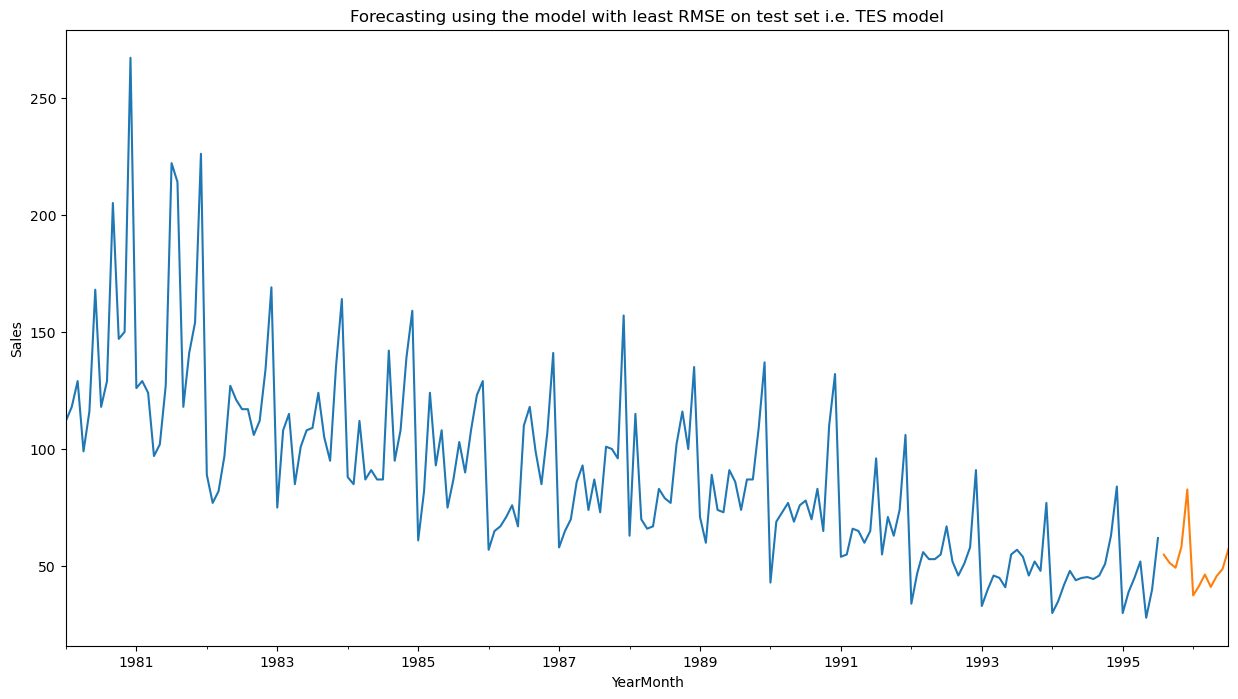

In [148]:
_,ax = plt.subplots(figsize=[15,8])
rose['Rose'].plot(ax=ax);
final_pred.plot(ax=ax);
plt.ylabel('Sales');
plt.title('Forecasting using the model with least RMSE on test set i.e. TES model');

***

# Thank you!